# **Loading Libraries & Data**

In [1]:
import requests
from bs4 import BeautifulSoup
import pickle
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def url_to_transcript(url):

    page = requests.get(url).text
    soup = BeautifulSoup(page, "lxml")
    post_content_element = soup.find()

    if post_content_element:
        text = [p.text for p in post_content_element.find_all('p')]
        print(url)
        return text
    else:
        print(f"No element with class 'post-content' found on {url}")
        return []

In [3]:
urls = ['https://scrapsfromtheloft.com/comedy/kevin-hart-seriously-funny-2010-full-transcript/',
        'https://scrapsfromtheloft.com/comedy/pete-davidson-turbo-fonzarelli-transcript/',
        'https://scrapsfromtheloft.com/comedy/sammy-obeid-martyr-in-safe-space-transcript/',
        'https://scrapsfromtheloft.com/comedy/dave-chappelle-the-dreamer-transcript/',
        'https://scrapsfromtheloft.com/comedy/anjelah-johnson-not-fancy-transcript/',
        'https://scrapsfromtheloft.com/comedy/gary-gulman-born-on-3rd-base-transcript/',
        'https://scrapsfromtheloft.com/comedy/trevor-noah-where-was-i-transcript/',
        'https://scrapsfromtheloft.com/comedy/beth-stelling-girl-daddy-transcript/',
        'https://scrapsfromtheloft.com/comedy/andrew-santino-home-field-advantage-transcript/',
        'https://scrapsfromtheloft.com/comedy/iliza-shlesinger-unveiled-transcript/',
        'https://scrapsfromtheloft.com/comedy/d-l-hughley-unapologetic-transcript/',
        'https://scrapsfromtheloft.com/comedy/sarah-cooper-everythings-fine-transcript/',
        'https://scrapsfromtheloft.com/comedy/larry-the-cable-guy-remain-seated-transcript/',
        'https://scrapsfromtheloft.com/comedy/chris-rocks-monologue-saturday-night-live-1996/',
        'https://scrapsfromtheloft.com/comedy/roy-wood-jr-father-figure-transcript/',
        'https://scrapsfromtheloft.com/comedy/catherine-cohen-the-twist-she-gorgeous-transcript/',
        'https://scrapsfromtheloft.com/comedy/whitney-cummings-can-i-touch-it-transcript/',
        'https://scrapsfromtheloft.com/comedy/kathleen-madigan-bothering-jesus-transcript/',
        'https://scrapsfromtheloft.com/comedy/orny-adams-more-than-loud-transcript/',
        'https://scrapsfromtheloft.com/comedy/patton-oswalt-we-all-scream-transcript/']

comedians = ['Kevin','Pete','Sammy','Dave','Anjelah','Gary','Trevor','Beth','Andrew','Iliza','Hughley','Sarah','Larry','Chris','Roywood','Catherine','Whitney','Kathleen','Orny','Patton']

In [4]:
transcripts = [url_to_transcript(u) for u in urls]

https://scrapsfromtheloft.com/comedy/kevin-hart-seriously-funny-2010-full-transcript/
https://scrapsfromtheloft.com/comedy/pete-davidson-turbo-fonzarelli-transcript/
https://scrapsfromtheloft.com/comedy/sammy-obeid-martyr-in-safe-space-transcript/
https://scrapsfromtheloft.com/comedy/dave-chappelle-the-dreamer-transcript/
https://scrapsfromtheloft.com/comedy/anjelah-johnson-not-fancy-transcript/
https://scrapsfromtheloft.com/comedy/gary-gulman-born-on-3rd-base-transcript/
https://scrapsfromtheloft.com/comedy/trevor-noah-where-was-i-transcript/
https://scrapsfromtheloft.com/comedy/beth-stelling-girl-daddy-transcript/
https://scrapsfromtheloft.com/comedy/andrew-santino-home-field-advantage-transcript/
https://scrapsfromtheloft.com/comedy/iliza-shlesinger-unveiled-transcript/
https://scrapsfromtheloft.com/comedy/d-l-hughley-unapologetic-transcript/
https://scrapsfromtheloft.com/comedy/sarah-cooper-everythings-fine-transcript/
https://scrapsfromtheloft.com/comedy/larry-the-cable-guy-remain

In [5]:
!mkdir transcripts

for i, c in enumerate(comedians):
    with open("transcripts/" + c + ".txt", "wb") as file:
         pickle.dump(transcripts[i], file)

mkdir: cannot create directory ‘transcripts’: File exists


In [6]:
data = {}
for i, c in enumerate(comedians):
    with open("transcripts/" + c + ".txt", "rb") as file:
        data[c] = pickle.load(file)

In [7]:
for comedian, transcript_data in data.items():
    print(f"Comedian: {comedian}")
    print("Transcript:")
    print(transcript_data)
    print("\n")

Comedian: Kevin
Transcript:
['Whoa! Yeah, Cleveland. What’s up, Cleveland? How you all feeling? Everybody good? Y’all good? Everybody straight? Cold as shit out this bitch, ain’t it? I don’t like that— All this snow. I don’t like that shit. Y’all got that slushy shit, that slipping snow. Hey, look— God damn it. There’s slush. There’s slush right there. Watch the slush. I don’t like that shit. Y’all ain’t supposed to have snow out here. I don’t like that shit. Y’all ain’t supposed to have snow out here. Good year for y’all though. Right now got— Before I even get started, shouts out to— — Hey, sugar foot. How you doing? How you doing, sweetie? Get it out now. Before we get started, shouts out to my man Shaq up front showing love. The cavs. My man LeBron in the house. Shout out to our boy LeBron in the house. It’s a good year for y’all. A good year for y’all. Y’all might do it. Y’all might do it. Y’all might do it. Y’all might do it. All right, y’all got me up here for a while, all right

In [8]:
data.keys()

dict_keys(['Kevin', 'Pete', 'Sammy', 'Dave', 'Anjelah', 'Gary', 'Trevor', 'Beth', 'Andrew', 'Iliza', 'Hughley', 'Sarah', 'Larry', 'Chris', 'Roywood', 'Catherine', 'Whitney', 'Kathleen', 'Orny', 'Patton'])

# **Data Cleaning**

In [9]:
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
import string
import re

nltk.download('punkt')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [10]:
def combine_text(list_of_text):
    combined_text = ' '.join(list_of_text)
    return combined_text

data_combined = {key: [combine_text(value)] for (key, value) in data.items()}
data_combined

{'Kevin': ["Whoa! Yeah, Cleveland. What’s up, Cleveland? How you all feeling? Everybody good? Y’all good? Everybody straight? Cold as shit out this bitch, ain’t it? I don’t like that— All this snow. I don’t like that shit. Y’all got that slushy shit, that slipping snow. Hey, look— God damn it. There’s slush. There’s slush right there. Watch the slush. I don’t like that shit. Y’all ain’t supposed to have snow out here. I don’t like that shit. Y’all ain’t supposed to have snow out here. Good year for y’all though. Right now got— Before I even get started, shouts out to— — Hey, sugar foot. How you doing? How you doing, sweetie? Get it out now. Before we get started, shouts out to my man Shaq up front showing love. The cavs. My man LeBron in the house. Shout out to our boy LeBron in the house. It’s a good year for y’all. A good year for y’all. Y’all might do it. Y’all might do it. Y’all might do it. Y’all might do it. All right, y’all got me up here for a while, all right? And this time— A

In [11]:
pd.set_option('max_colwidth', 150)

data_df = pd.DataFrame.from_dict(data_combined).transpose()
data_df.columns = ['transcript']
data_df = data_df.sort_index()
data_df

transcript
Andrew     Hey, it’s Andrew Santino, and here I am in my hometown, Chicago, Illinois, where I’m shooting my stand-up comedy special, but before I do, I want ...
Anjelah    Not Fancy was filmed at the City National Grove in Anaheim, California. Anjelah Johnson talks about touring and prepping for her trip to Europe, h...
Beth       Beth Stelling’s stand-up comedy special, “Girl Daddy,” was released on HBO Max on August 20, 2020. The show was recorded at the Varsity Theater in...
Catherine  I’m starring in a show! I’m Catherine and I dance very beautiful! [man] Hey, Catherine. [young Catherine laughs] No pictures. No pictures. No pict...
Chris      Saturday Night Live Season 22: Episode 5\nNovember 2, 1996 …..Chris Rock Chris Rock: What’s up! Good to be back – I live here! So, I guess it’s no...
Dave       “The Dreamer,” which was shot in Chappelle’s hometown of Washington, D.C., at the Lincoln Theatre, marks Chappelle’s seventh special with Netflix....
Gary       Gary Gulman’s “Born on 3rd Base” transcends traditional observational comedy, offering an hour-long commentary on poverty and inequality with humo...
Hughley    [Audience cheering] (DL Hughley enters from stage left with his head cocked and grabs the microphone) Hey now! How yallll doiinnnnnn. How yall doi...
Iliza      Thank you, Nashville! Thank you. So this year was a really important year for me because I got… Thank you. I appreciate that. I appreciate that re...
Kathleen   [chattering] [man] Whoo! [chattering] [woman] ♪ Kathleen ♪ ♪ Madigan ♪ ♪ Kathleen ♪ ♪ Madigan ♪ ♪ She’s coming on the stage now ♪ [audience laughs...
Kevin      Whoa! Yeah, Cleveland. What’s up, Cleveland? How you all feeling? Everybody good? Y’all good? Everybody straight? Cold as shit out this bitch, ain...
Larry      [Announcer] Ladies and gentlemen, Larry, The Cable Guy! [crowd cheer and applaud] All right. Thank you. Please remain seated. Do not rush the stag...
Orny       Title: Orny Adams: More Than Loud\nType: Stand-up comedy special\nRelease date: December 1, 2017\nAvailability: You can watch the full special for...
Patton     [“Hard to Kill” by Bleached plays] [audience cheering and applauding] Hello! Denver! [cheering and applause continues] [Patton laughs] Oh my God! ...
Pete       Pete Davidson: Turbo Fonzarelli (2024)\nReleased date: January 9, 2024 (Netflix)\nRuntime: 56 min In “Pete Davidson: Turbo Fonzarelli,” released o...
Roywood    Look, I’m probably not gonna live long enough to teach you everything you need to know, so let’s just run through a couple things real fast. Numbe...
Sammy      In this stand-up comedy show, Sammy Obeid reflects on his unexpected realization that he might not align with the traditional definition of a libe...
Sarah      [anthemic classical music playing] [narrator] This story is about Sarah Cooper, who was a morning news anchor from the spring of 2017 to the fall ...
Trevor     [lively music playing] [announcer] Detroit, give it up… for Trevor Noah! [audience cheering] What’s going on, Detroit? Oh! How you doing tonight, ...
Whitney    Ladies and gentlemen… Whitney Cummings! This is awesome. I am shooting my fourth stand-up special this evening in my hometown, Washington DC. Than...

In [12]:
def clean_text_round1(text):
    text = text.lower()
    text = re.sub('\[.*?\]', '', text)
    text = re.sub('[%s]' % re.escape(string.punctuation), '', text)
    text = re.sub('\w*\d\w*', '', text)
    return text

round1 = lambda x: clean_text_round1(x)

In [13]:
data_clean = pd.DataFrame(data_df.transcript.apply(round1))
data_clean

transcript
Andrew     hey it’s andrew santino and here i am in my hometown chicago illinois where i’m shooting my standup comedy special but before i do i want to take ...
Anjelah    not fancy was filmed at the city national grove in anaheim california anjelah johnson talks about touring and prepping for her trip to europe her ...
Beth       beth stelling’s standup comedy special “girl daddy” was released on hbo max on august   the show was recorded at the varsity theater in minneapoli...
Catherine  i’m starring in a show i’m catherine and i dance very beautiful  hey catherine  no pictures no pictures no pictures well i’m just gonna walk into ...
Chris      saturday night live season  episode \nnovember   …chris rock chris rock what’s up good to be back – i live here so i guess it’s not good to be bac...
Dave       “the dreamer” which was shot in chappelle’s hometown of washington dc at the lincoln theatre marks chappelle’s seventh special with netflix stan l...
Gary       gary gulman’s “born on  base” transcends traditional observational comedy offering an hourlong commentary on poverty and inequality with humor and...
Hughley     dl hughley enters from stage left with his head cocked and grabs the microphone hey now how yallll doiinnnnnn how yall doin chocolate city goddam...
Iliza      thank you nashville thank you so this year was a really important year for me because i got… thank you i appreciate that i appreciate that recipro...
Kathleen     whoo   ♪ kathleen ♪ ♪ madigan ♪ ♪ kathleen ♪ ♪ madigan ♪ ♪ she’s coming on the stage now ♪  ♪ she’s gonna be here shortly ♪ ♪ she even put some ...
Kevin      whoa yeah cleveland what’s up cleveland how you all feeling everybody good y’all good everybody straight cold as shit out this bitch ain’t it i do...
Larry       ladies and gentlemen larry the cable guy  all right thank you please remain seated do not rush the stage thank you well this is awesome who cance...
Orny       title orny adams more than loud\ntype standup comedy special\nrelease date december  \navailability you can watch the full special for free on you...
Patton       hello denver   oh my god hello thank you thank you thank you  thank you oh my god yes thank you all so much for coming out tonight um… hey i bro...
Pete       pete davidson turbo fonzarelli \nreleased date january   netflix\nruntime  min in “pete davidson turbo fonzarelli” released on january   on netfli...
Roywood    look i’m probably not gonna live long enough to teach you everything you need to know so let’s just run through a couple things real fast number o...
Sammy      in this standup comedy show sammy obeid reflects on his unexpected realization that he might not align with the traditional definition of a libera...
Sarah        this story is about sarah cooper who was a morning news anchor from the spring of  to the fall of  at her peak cooper had a hut rating of  and a...
Trevor       detroit give it up… for trevor noah  what’s going on detroit oh how you doing tonight everybody how you doing welcome to the show thank you so m...
Whitney    ladies and gentlemen… whitney cummings this is awesome i am shooting my fourth standup special this evening in my hometown washington dc thank you...

2nd Round of Cleaning

In [14]:
def clean_text_round2(text):
    text = re.sub('[‘’“”…]', '', text)
    text = re.sub('\n', '', text)
    text = re.sub(r'[^a-zA-Z0-9\s]', '', text)
    return text

round2 = lambda x: clean_text_round2(x)

In [15]:
data_clean = pd.DataFrame(data_clean.transcript.apply(round2))
data_clean

transcript
Andrew     hey its andrew santino and here i am in my hometown chicago illinois where im shooting my standup comedy special but before i do i want to take yo...
Anjelah    not fancy was filmed at the city national grove in anaheim california anjelah johnson talks about touring and prepping for her trip to europe her ...
Beth       beth stellings standup comedy special girl daddy was released on hbo max on august   the show was recorded at the varsity theater in minneapolis m...
Catherine  im starring in a show im catherine and i dance very beautiful  hey catherine  no pictures no pictures no pictures well im just gonna walk into the...
Chris      saturday night live season  episode november   chris rock chris rock whats up good to be back  i live here so i guess its not good to be back its ...
Dave       the dreamer which was shot in chappelles hometown of washington dc at the lincoln theatre marks chappelles seventh special with netflix stan latha...
Gary       gary gulmans born on  base transcends traditional observational comedy offering an hourlong commentary on poverty and inequality with humor and un...
Hughley     dl hughley enters from stage left with his head cocked and grabs the microphone hey now how yallll doiinnnnnn how yall doin chocolate city goddam...
Iliza      thank you nashville thank you so this year was a really important year for me because i got thank you i appreciate that i appreciate that reciproc...
Kathleen     whoo    kathleen   madigan   kathleen   madigan   shes coming on the stage now    shes gonna be here shortly   she even put some pants on   at l...
Kevin      whoa yeah cleveland whats up cleveland how you all feeling everybody good yall good everybody straight cold as shit out this bitch aint it i dont ...
Larry       ladies and gentlemen larry the cable guy  all right thank you please remain seated do not rush the stage thank you well this is awesome who cance...
Orny       title orny adams more than loudtype standup comedy specialrelease date december  availability you can watch the full special for free on youtube o...
Patton       hello denver   oh my god hello thank you thank you thank you  thank you oh my god yes thank you all so much for coming out tonight um hey i brok...
Pete       pete davidson turbo fonzarelli released date january   netflixruntime  min in pete davidson turbo fonzarelli released on january   on netflix davi...
Roywood    look im probably not gonna live long enough to teach you everything you need to know so lets just run through a couple things real fast number one...
Sammy      in this standup comedy show sammy obeid reflects on his unexpected realization that he might not align with the traditional definition of a libera...
Sarah        this story is about sarah cooper who was a morning news anchor from the spring of  to the fall of  at her peak cooper had a hut rating of  and a...
Trevor       detroit give it up for trevor noah  whats going on detroit oh how you doing tonight everybody how you doing welcome to the show thank you so muc...
Whitney    ladies and gentlemen whitney cummings this is awesome i am shooting my fourth standup special this evening in my hometown washington dc thank you ...

# **Organization of Data**

**Corpus Data Frame**

In [16]:
FullNames = ['Kevin','Pete','Sammy','Dave','Anjelah','Gary','Trevor','Beth','Andrew','Iliza','Hughley','Sarah','Larry','Chris','Roywood','Catherine','Whitney','Kathleen','Orny','Patton']
FullNames.sort()

data_df['full_name'] = FullNames
data_df

transcript  \
Andrew     Hey, it’s Andrew Santino, and here I am in my hometown, Chicago, Illinois, where I’m shooting my stand-up comedy special, but before I do, I want ...   
Anjelah    Not Fancy was filmed at the City National Grove in Anaheim, California. Anjelah Johnson talks about touring and prepping for her trip to Europe, h...   
Beth       Beth Stelling’s stand-up comedy special, “Girl Daddy,” was released on HBO Max on August 20, 2020. The show was recorded at the Varsity Theater in...   
Catherine  I’m starring in a show! I’m Catherine and I dance very beautiful! [man] Hey, Catherine. [young Catherine laughs] No pictures. No pictures. No pict...   
Chris      Saturday Night Live Season 22: Episode 5\nNovember 2, 1996 …..Chris Rock Chris Rock: What’s up! Good to be back – I live here! So, I guess it’s no...   
Dave       “The Dreamer,” which was shot in Chappelle’s hometown of Washington, D.C., at the Lincoln Theatre, marks Chappelle’s seventh special with Netflix....   
Gary       Gary Gulman’s “Born on 3rd Base” transcends traditional observational comedy, offering an hour-long commentary on poverty and inequality with humo...   
Hughley    [Audience cheering] (DL Hughley enters from stage left with his head cocked and grabs the microphone) Hey now! How yallll doiinnnnnn. How yall doi...   
Iliza      Thank you, Nashville! Thank you. So this year was a really important year for me because I got… Thank you. I appreciate that. I appreciate that re...   
Kathleen   [chattering] [man] Whoo! [chattering] [woman] ♪ Kathleen ♪ ♪ Madigan ♪ ♪ Kathleen ♪ ♪ Madigan ♪ ♪ She’s coming on the stage now ♪ [audience laughs...   
Kevin      Whoa! Yeah, Cleveland. What’s up, Cleveland? How you all feeling? Everybody good? Y’all good? Everybody straight? Cold as shit out this bitch, ain...   
Larry      [Announcer] Ladies and gentlemen, Larry, The Cable Guy! [crowd cheer and applaud] All right. Thank you. Please remain seated. Do not rush the stag...   
Orny       Title: Orny Adams: More Than Loud\nType: Stand-up comedy special\nRelease date: December 1, 2017\nAvailability: You can watch the full special for...   
Patton     [“Hard to Kill” by Bleached plays] [audience cheering and applauding] Hello! Denver! [cheering and applause continues] [Patton laughs] Oh my God! ...   
Pete       Pete Davidson: Turbo Fonzarelli (2024)\nReleased date: January 9, 2024 (Netflix)\nRuntime: 56 min In “Pete Davidson: Turbo Fonzarelli,” released o...   
Roywood    Look, I’m probably not gonna live long enough to teach you everything you need to know, so let’s just run through a couple things real fast. Numbe...   
Sammy      In this stand-up comedy show, Sammy Obeid reflects on his unexpected realization that he might not align with the traditional definition of a libe...   
Sarah      [anthemic classical music playing] [narrator] This story is about Sarah Cooper, who was a morning news anchor from the spring of 2017 to the fall ...   
Trevor     [lively music playing] [announcer] Detroit, give it up… for Trevor Noah! [audience cheering] What’s going on, Detroit? Oh! How you doing tonight, ...   
Whitney    Ladies and gentlemen… Whitney Cummings! This is awesome. I am shooting my fourth stand-up special this evening in my hometown, Washington DC. Than...   

           full_name  
Andrew        Andrew  
Anjelah      Anjelah  
Beth            Beth  
Catherine  Catherine  
Chris          Chris  
Dave            Dave  
Gary            Gary  
Hughley      Hughley  
Iliza          Iliza  
Kathleen    Kathleen  
Kevin          Kevin  
Larry          Larry  
Orny            Orny  
Patton        Patton  
Pete            Pete  
Roywood      Roywood  
Sammy          Sammy  
Sarah          Sarah  
Trevor        Trevor  
Whitney      Whitney

In [17]:
data_df.to_pickle("corpus.pkl")

**Document Term Matrix**

In [18]:
from sklearn.feature_extraction.text import CountVectorizer

cv = CountVectorizer(stop_words='english')
data_cv = cv.fit_transform(data_clean.transcript)
data_dtm = pd.DataFrame(data_cv.toarray(), columns=cv.get_feature_names_out())
data_dtm.index = data_clean.index
data_dtm

aa  aaaaaah  aah  abandoned  abbreviated  abducted  abduction  \
Andrew      0        0    1          0            0         0          0   
Anjelah     0        0    0          0            0         0          0   
Beth        0        0    0          0            0         0          0   
Catherine   0        0    0          0            0         0          0   
Chris       0        0    0          0            0         0          0   
Dave        0        0    1          0            0         0          0   
Gary        2        0    0          0            0         0          0   
Hughley     0        0    0          0            0         0          1   
Iliza       0        0    0          0            0         0          0   
Kathleen    0        0    0          0            0         1          0   
Kevin       0        1    1          0            0         0          0   
Larry       0        0    1          0            0         0          0   
Orny        0        0    0          0            3         0          0   
Patton      0        0    0          0            0         0          0   
Pete        0        0    1          0            0         0          0   
Roywood     0        0    0          0            0         0          0   
Sammy       0        0    0          0            0         0          0   
Sarah       0        0    0          1            0         0          0   
Trevor      0        0    0          0            0         0          0   
Whitney     0        0    0          0            0         0          0   

           abhor  abhorring  abide  ...  ziploced  ziplock  zipper  zipping  \
Andrew         0          0      0  ...         0        0       0        0   
Anjelah        0          0      0  ...         0        0       0        0   
Beth           0          0      0  ...         0        0       0        0   
Catherine      2          0      0  ...         0        0       0        0   
Chris          0          0      0  ...         0        0       0        0   
Dave           0          0      0  ...         0        0       0        0   
Gary           0          0      1  ...         0        0       0        0   
Hughley        0          0      0  ...         0        0       0        0   
Iliza          0          0      0  ...         0        0       0        0   
Kathleen       0          1      0  ...         0        0       0        0   
Kevin          0          0      0  ...         0        0       0        0   
Larry          0          0      0  ...         0        1       0        1   
Orny           0          0      0  ...         0        0       1        0   
Patton         0          0      0  ...         0        0       0        0   
Pete           0          0      0  ...         1        0       0        0   
Roywood        0          0      0  ...         0        0       0        0   
Sammy          0          0      0  ...         0        0       0        0   
Sarah          0          0      0  ...         0        0       0        0   
Trevor         0          0      0  ...         0        0       0        0   
Whitney        0          0      0  ...         0        0       0        0   

           zit  zombie  zone  zoo  zoom  zorb  
Andrew       0       0     2    0     0     1  
Anjelah      0       0     0    0     0     0  
Beth         0       0     0    0     0     0  
Catherine    1       0     0    0     0     0  
Chris        0       0     0    0     0     0  
Dave         0       0     0    0     0     0  
Gary         0       0     0    0     0     0  
Hughley      0       0     0    0     0     0  
Iliza        0       1     0    0     0     0  
Kathleen     0       0     0    0     0     0  
Kevin        0       0     0    0     0     0  
Larry        0       0     0    0     0     0  
Orny         0       0     0    0     1     0  
Patton       0       0     0    0     2     0  
Pete         0       0     1    0 

In [19]:
data_dtm.to_pickle("dtm.pkl")

In [20]:
data_clean.to_pickle('data_clean.pkl')
pickle.dump(cv, open("cv.pkl", "wb"))

Answer 1 :-
*   Lemmatization or Stemming: Reducing words to their base or root form
*   We can remove any urls that might be present in the text \
    text = re.sub(r'http\S+', '', text)

Answer 2 :-\
CountVectorizer, there are several parameters that we can adjust to customize the behavior of the vectorizer.

1.   ngram_range

*   ngram_range is a tuple specifying the range of n-grams to consider when tokenizing the text.
*   Default: ngram_range=(1, 1) means the vectorizer considers only single words (unigrams).
* EX :- vectorizer = CountVectorizer(ngram_range=(1, 2))


2.   min_df and max_df


*   min_df is the minimum number of documents (or fraction of documents) a word must appear in to be included in the vocabulary.
*   max_df is the maximum number of documents (or fraction of documents) a word can appear in to be included in the vocabulary.
*   min_df=1 means a word must appear in at least one document.
*   max_df=1.0 means a word can appear in any number of documents.
*   EX :-\
If min_df=2, a word must appear in at least two documents to be included.\
If max_df=0.5, a word can't appear in more than 50% of the documents.\
vectorizer = CountVectorizer(min_df=2, max_df=0.8)




# **EDA**

In [21]:
Data = pd.read_pickle('dtm.pkl')
Data = Data.transpose()
Data.head()

Andrew  Anjelah  Beth  Catherine  Chris  Dave  Gary  Hughley  \
aa                0        0     0          0      0     0     2        0   
aaaaaah           0        0     0          0      0     0     0        0   
aah               1        0     0          0      0     1     0        0   
abandoned         0        0     0          0      0     0     0        0   
abbreviated       0        0     0          0      0     0     0        0   

             Iliza  Kathleen  Kevin  Larry  Orny  Patton  Pete  Roywood  \
aa               0         0      0      0     0       0     0        0   
aaaaaah          0         0      1      0     0       0     0        0   
aah              0         0      1      1     0       0     1        0   
abandoned        0         0      0      0     0       0     0        0   
abbreviated      0         0      0      0     3       0     0        0   

             Sammy  Sarah  Trevor  Whitney  
aa               0      0       0        0  
aaaaaah          0      0       0        0  
aah              0      0       0        0  
abandoned        0      1       0        0  
abbreviated      0      0       0        0

In [22]:
Data.columns

Index(['Andrew', 'Anjelah', 'Beth', 'Catherine', 'Chris', 'Dave', 'Gary',
       'Hughley', 'Iliza', 'Kathleen', 'Kevin', 'Larry', 'Orny', 'Patton',
       'Pete', 'Roywood', 'Sammy', 'Sarah', 'Trevor', 'Whitney'],
      dtype='object')

In [23]:
top_dict = {}
for c in Data.columns:
    top = Data[c].sort_values(ascending=False).head(30)
    top_dict[c]= list(zip(top.index, top.values))

top_dict

{'Andrew': [('like', 264),
  ('know', 90),
  ('im', 85),
  ('thats', 81),
  ('dont', 64),
  ('man', 62),
  ('got', 61),
  ('want', 54),
  ('shit', 54),
  ('right', 54),
  ('youre', 53),
  ('guy', 52),
  ('people', 49),
  ('gonna', 42),
  ('good', 41),
  ('guys', 39),
  ('say', 37),
  ('okay', 37),
  ('really', 36),
  ('fuck', 36),
  ('just', 36),
  ('thing', 34),
  ('theyre', 32),
  ('black', 32),
  ('think', 29),
  ('cause', 29),
  ('hey', 26),
  ('come', 26),
  ('gay', 26),
  ('bad', 26)],
 'Anjelah': [('like', 186),
  ('right', 93),
  ('im', 89),
  ('dont', 52),
  ('just', 49),
  ('cause', 41),
  ('know', 39),
  ('okay', 37),
  ('gonna', 33),
  ('thats', 29),
  ('oh', 27),
  ('uh', 25),
  ('guys', 25),
  ('time', 22),
  ('hes', 22),
  ('good', 21),
  ('real', 21),
  ('people', 21),
  ('youre', 20),
  ('husband', 19),
  ('yeah', 18),
  ('tell', 17),
  ('baby', 17),
  ('did', 17),
  ('got', 16),
  ('getting', 16),
  ('trying', 15),
  ('mean', 15),
  ('really', 15),
  ('want', 15)],
 '

In [24]:
for comedian, top_words in top_dict.items():
    print(comedian)
    print(', '.join([word for word, count in top_words[0:15]]))
    print('---')

Andrew
like, know, im, thats, dont, man, got, want, shit, right, youre, guy, people, gonna, good
---
Anjelah
like, right, im, dont, just, cause, know, okay, gonna, thats, oh, uh, guys, time, hes
---
Beth
like, just, im, dont, know, youre, think, going, people, feel, thats, sex, theres, hes, got
---
Catherine
like, im, look, just, want, oh, know, dont, thats, ill, really, think, love, money, say
---
Chris
got, know, dont, harassment, sexual, man, clinton, just, thats, trying, mall, like, aint, mean, theyre
---
Dave
know, im, like, said, man, tell, ngga, everybody, didnt, just, dont, right, time, shit, thats
---
Gary
just, people, like, say, dont, im, said, poor, know, youre, gonna, think, work, got, wanna
---
Hughley
shit, dont, fuck, know, man, like, hughley, aint, im, thats, fucking, gonna, got, voice, yall
---
Iliza
like, youre, im, dont, okay, know, just, thats, right, want, women, yeah, time, wedding, theyre
---
Kathleen
im, dont, know, like, gonna, thats, people, just, youre, caus

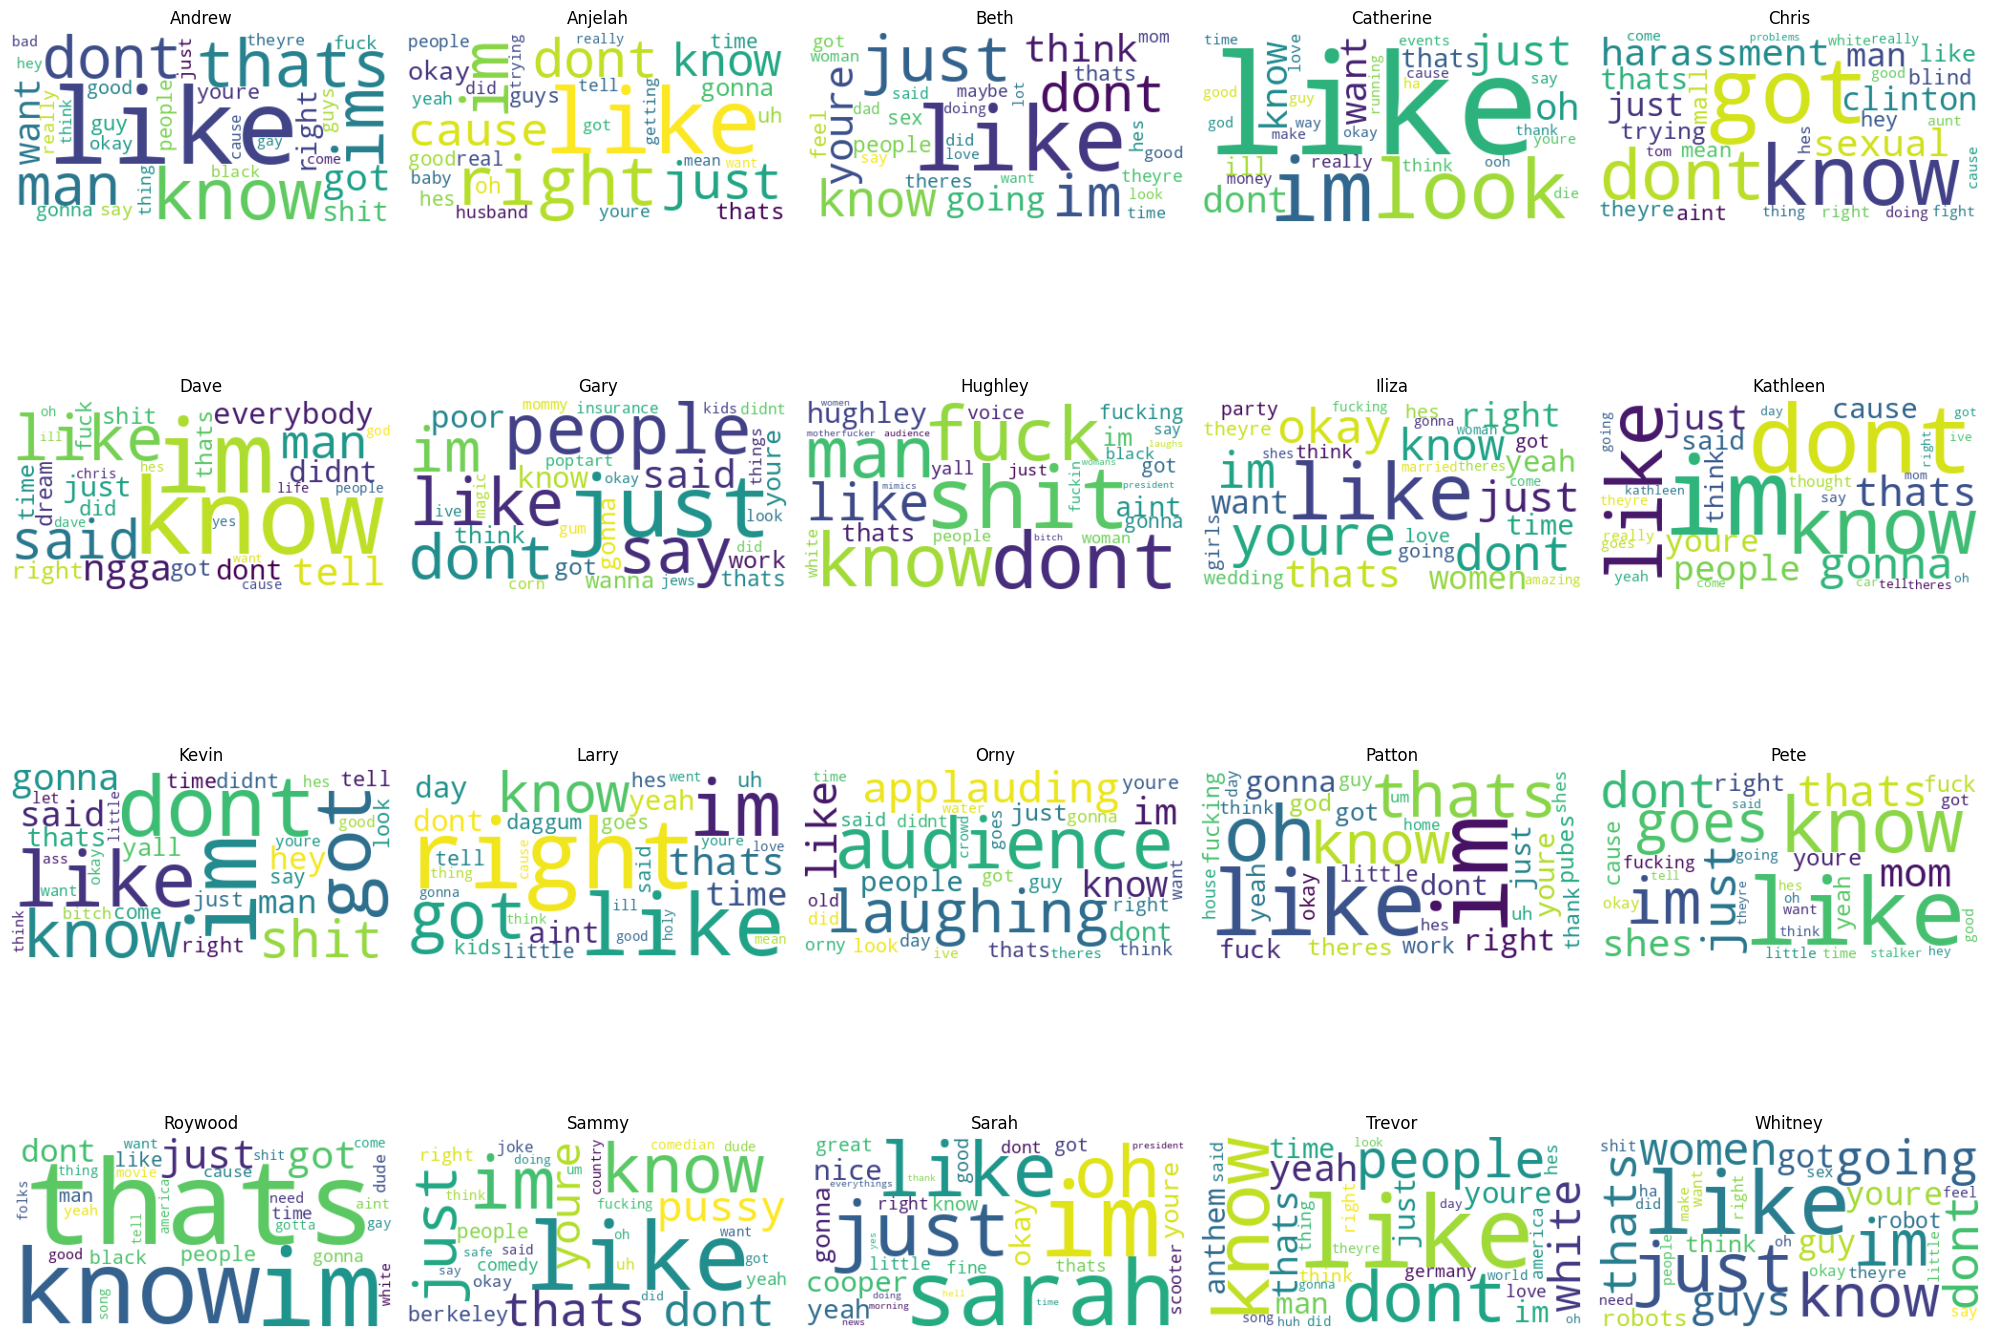

In [25]:
from wordcloud import WordCloud

num_rows = 4
num_cols = 5

fig, axs = plt.subplots(num_rows, num_cols, figsize=(20, 16))

for i, (comedian, top_words) in enumerate(top_dict.items()):
    row = i // num_cols
    col = i % num_cols

    words = {word: count for word, count in top_words}

    wordcloud = WordCloud(width=400, height=200, background_color='white').generate_from_frequencies(words)

    axs[row, col].imshow(wordcloud, interpolation='bilinear')
    axs[row, col].set_title(comedian)
    axs[row, col].axis('off')

plt.tight_layout()
plt.show()

**Observation:**
As observed in Orny's transcript, the term 'laughing audience' appears most frequently. However, this may not provide meaningful insights and could be considered irrelevant noise to the model.

In [26]:
from collections import Counter

words = []
for comedian in Data.columns:
    top = [word for (word, count) in top_dict[comedian]]
    for t in top:
        words.append(t)
words

['like',
 'know',
 'im',
 'thats',
 'dont',
 'man',
 'got',
 'want',
 'shit',
 'right',
 'youre',
 'guy',
 'people',
 'gonna',
 'good',
 'guys',
 'say',
 'okay',
 'really',
 'fuck',
 'just',
 'thing',
 'theyre',
 'black',
 'think',
 'cause',
 'hey',
 'come',
 'gay',
 'bad',
 'like',
 'right',
 'im',
 'dont',
 'just',
 'cause',
 'know',
 'okay',
 'gonna',
 'thats',
 'oh',
 'uh',
 'guys',
 'time',
 'hes',
 'good',
 'real',
 'people',
 'youre',
 'husband',
 'yeah',
 'tell',
 'baby',
 'did',
 'got',
 'getting',
 'trying',
 'mean',
 'really',
 'want',
 'like',
 'just',
 'im',
 'dont',
 'know',
 'youre',
 'think',
 'going',
 'people',
 'feel',
 'thats',
 'sex',
 'theres',
 'hes',
 'got',
 'theyre',
 'maybe',
 'mom',
 'did',
 'woman',
 'time',
 'good',
 'said',
 'say',
 'dad',
 'look',
 'want',
 'doing',
 'lot',
 'love',
 'like',
 'im',
 'look',
 'just',
 'want',
 'oh',
 'know',
 'dont',
 'thats',
 'ill',
 'really',
 'think',
 'love',
 'money',
 'say',
 'die',
 'time',
 'events',
 'thank',
 '

In [27]:
Counter(words).most_common()

[('like', 20),
 ('know', 20),
 ('thats', 20),
 ('dont', 20),
 ('im', 19),
 ('just', 19),
 ('got', 18),
 ('youre', 16),
 ('right', 15),
 ('think', 14),
 ('gonna', 13),
 ('want', 12),
 ('people', 12),
 ('time', 12),
 ('okay', 11),
 ('good', 10),
 ('oh', 10),
 ('hes', 10),
 ('yeah', 10),
 ('said', 10),
 ('say', 9),
 ('cause', 9),
 ('theyre', 8),
 ('did', 8),
 ('man', 7),
 ('tell', 7),
 ('shit', 6),
 ('come', 6),
 ('look', 6),
 ('little', 6),
 ('guy', 5),
 ('really', 5),
 ('fuck', 5),
 ('thing', 5),
 ('going', 5),
 ('theres', 5),
 ('love', 5),
 ('fucking', 5),
 ('day', 5),
 ('hey', 4),
 ('uh', 4),
 ('doing', 4),
 ('aint', 4),
 ('white', 4),
 ('didnt', 4),
 ('goes', 4),
 ('guys', 3),
 ('black', 3),
 ('mean', 3),
 ('mom', 3),
 ('woman', 3),
 ('ill', 3),
 ('thank', 3),
 ('god', 3),
 ('ive', 3),
 ('women', 3),
 ('shes', 3),
 ('gay', 2),
 ('trying', 2),
 ('feel', 2),
 ('sex', 2),
 ('ha', 2),
 ('make', 2),
 ('yes', 2),
 ('work', 2),
 ('kids', 2),
 ('yall', 2),
 ('president', 2),
 ('audience', 2)

In [28]:
add_stop_words = [word for word, count in Counter(words).most_common() if count > 6]
add_stop_words

['like',
 'know',
 'thats',
 'dont',
 'im',
 'just',
 'got',
 'youre',
 'right',
 'think',
 'gonna',
 'want',
 'people',
 'time',
 'okay',
 'good',
 'oh',
 'hes',
 'yeah',
 'said',
 'say',
 'cause',
 'theyre',
 'did',
 'man',
 'tell']

In [29]:
from sklearn.feature_extraction import text

data_clean = pd.read_pickle('data_clean.pkl')
stop_words = list(text.ENGLISH_STOP_WORDS.union(add_stop_words))

cv = CountVectorizer(stop_words=stop_words)
data_cv = cv.fit_transform(data_clean.transcript)
data_stop = pd.DataFrame(data_cv.toarray(), columns=cv.get_feature_names_out())
data_stop.index = data_clean.index

pickle.dump(cv, open("cv_stop.pkl", "wb"))
data_stop.to_pickle("dtm_stop.pkl")

In [30]:
from wordcloud import WordCloud

wc = WordCloud(stopwords=stop_words, background_color="white", colormap="Dark2",max_font_size=150, random_state=42)

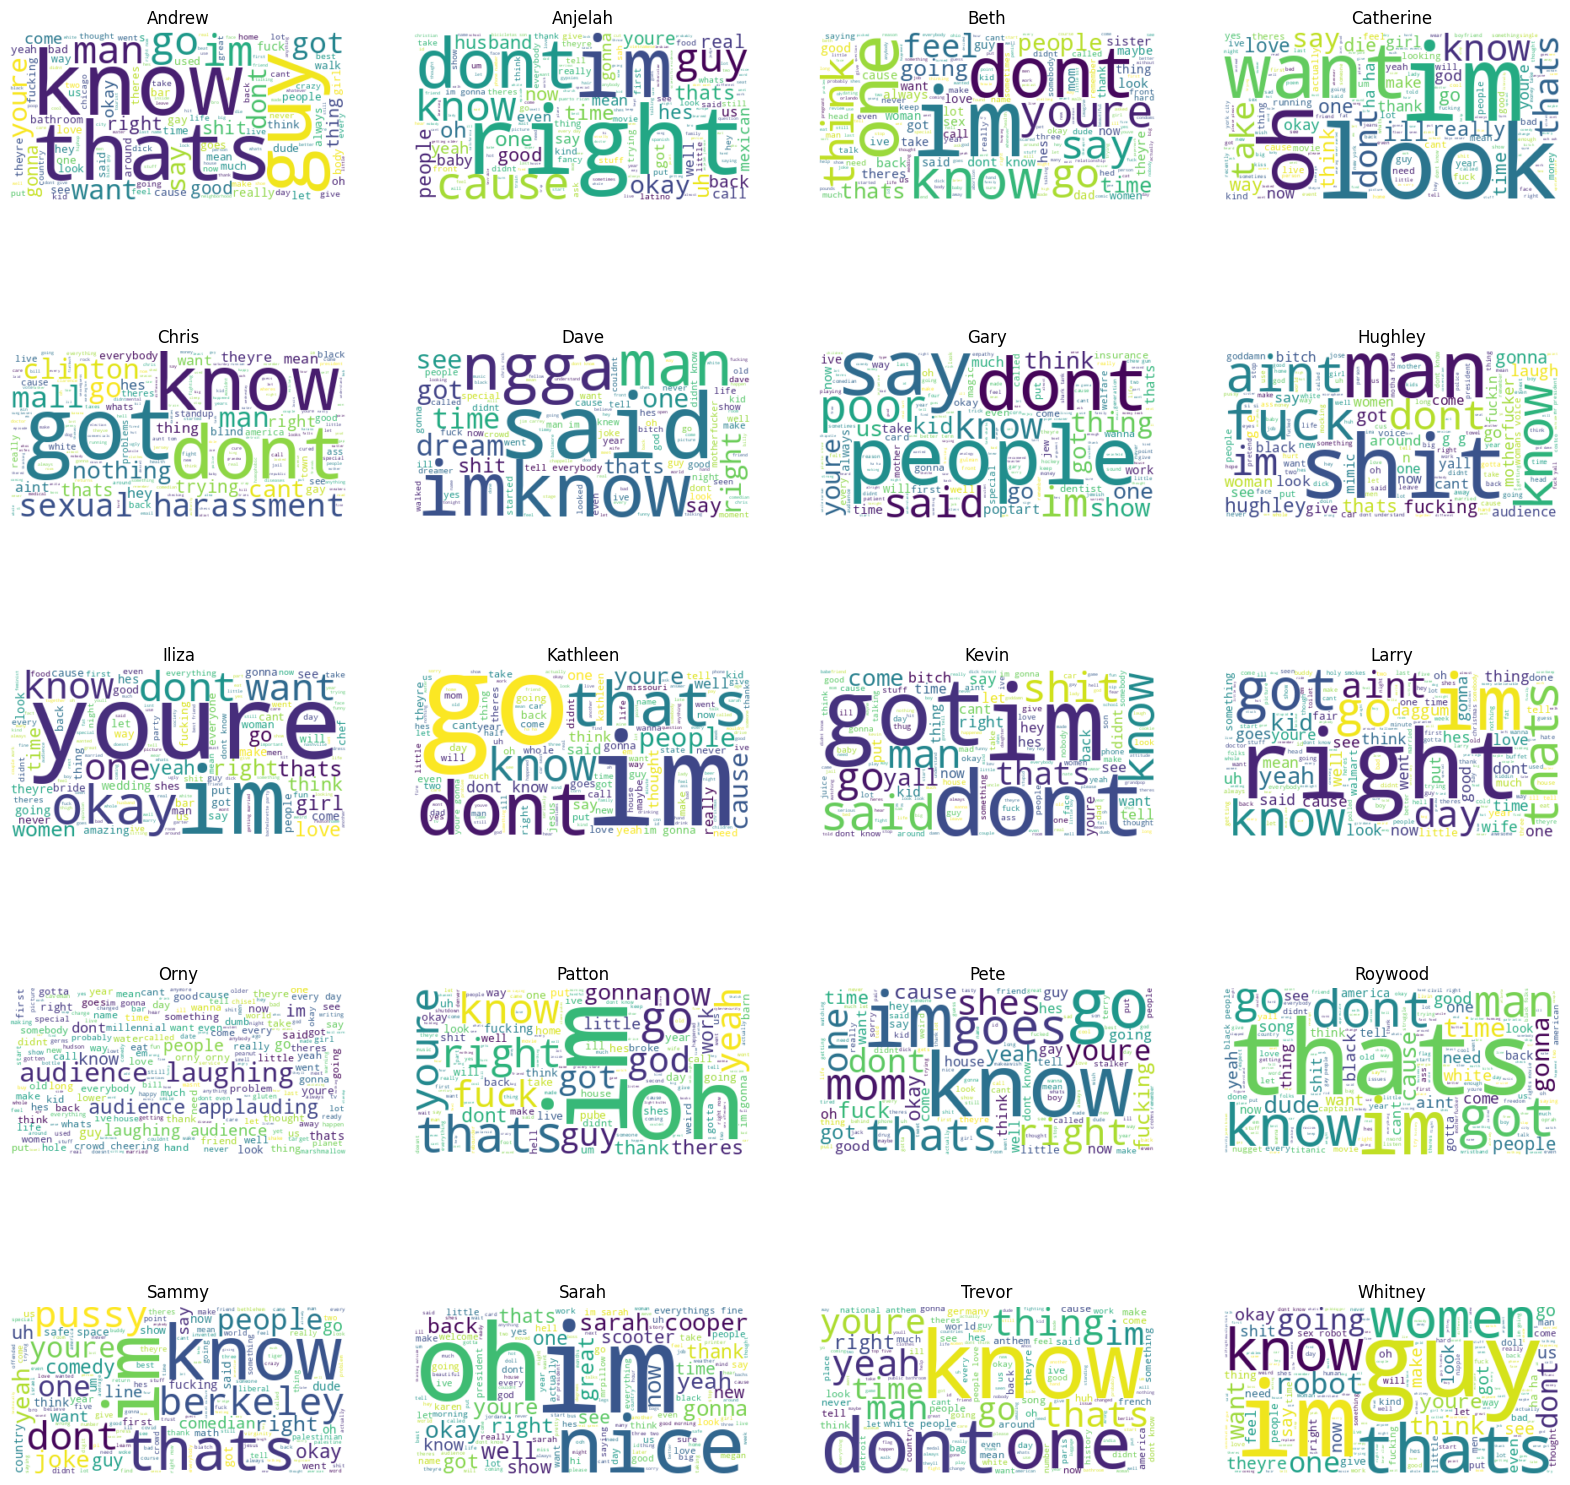

In [31]:
plt.rcParams['figure.figsize'] = [20, 20]

FullNames = ['Kevin','Pete','Sammy','Dave','Anjelah','Gary','Trevor','Beth','Andrew','Iliza','Hughley','Sarah','Larry','Chris','Roywood','Catherine','Whitney','Kathleen','Orny','Patton']
FullNames.sort()

wc = WordCloud(background_color="white", contour_color='purple', contour_width=3)

for index, comedian in enumerate(Data.columns):
    wc.generate(data_clean.transcript[comedian])

    plt.subplot(5, 4, index+1)
    plt.imshow(wc, interpolation="bilinear")
    plt.axis("off")
    plt.title(FullNames[index])

plt.show()

Observations :-
1. Comedian Hughley often seems to use S-Word and F-Word in his standups.
2. Among comedic performances, the words 'know' and 'right' are seen as most spoken words.
3. Most comedians frequently incorporate profanity such as the f-word, p-word and s-word into their performances.
4. It seems that Sarah tends to use sentences like "I'm nice", which might indicate a sense of self-obsession, as evident in the word cloud.

In [32]:
unique_list = []
for comedian in Data.columns:
    uniques = Data[comedian].to_numpy().nonzero()[0].size
    unique_list.append(uniques)

data_words = pd.DataFrame(list(zip(FullNames, unique_list)), columns=['comedian', 'unique_words'])
data_unique_sort = data_words.sort_values(by='unique_words')
data_unique_sort

comedian  unique_words
4       Chris           287
15    Roywood           973
16      Sammy          1146
5        Dave          1185
10      Kevin          1185
1     Anjelah          1209
14       Pete          1229
18     Trevor          1245
17      Sarah          1284
3   Catherine          1317
0      Andrew          1394
19    Whitney          1405
13     Patton          1431
6        Gary          1453
2        Beth          1478
12       Orny          1485
7     Hughley          1561
9    Kathleen          1590
11      Larry          1636
8       Iliza          1715

In [33]:
total_list = []
for comedian in Data.columns:
    totals = sum(Data[comedian])
    total_list.append(totals)

run_times = [60, 59, 80, 60, 67, 73, 77, 63, 62, 58, 55, 54, 75, 84, 70, 55, 84, 66, 76, 78]

data_words = pd.DataFrame(index=Data.columns)

data_words['total_words'] = total_list
data_words['run_times'] = run_times
data_words['words_per_minute'] = data_words['total_words'] / data_words['run_times']
data_wpm_sort = data_words.sort_values(by='words_per_minute')

print(data_wpm_sort)

           total_words  run_times  words_per_minute
Chris              473         67          7.059701
Sammy             3136         84         37.333333
Gary              3147         77         40.870130
Patton            3661         84         43.583333
Beth              3659         80         45.737500
Dave              3453         73         47.301370
Sarah             3285         66         49.772727
Whitney           4156         78         53.282051
Roywood           2986         55         54.290909
Pete              3876         70         55.371429
Trevor            4210         76         55.394737
Anjelah           3580         59         60.677966
Catherine         3815         60         63.583333
Orny              5127         75         68.360000
Hughley           4650         63         73.809524
Iliza             4658         62         75.129032
Kathleen          4788         58         82.551724
Larry             4631         54         85.759259
Andrew      

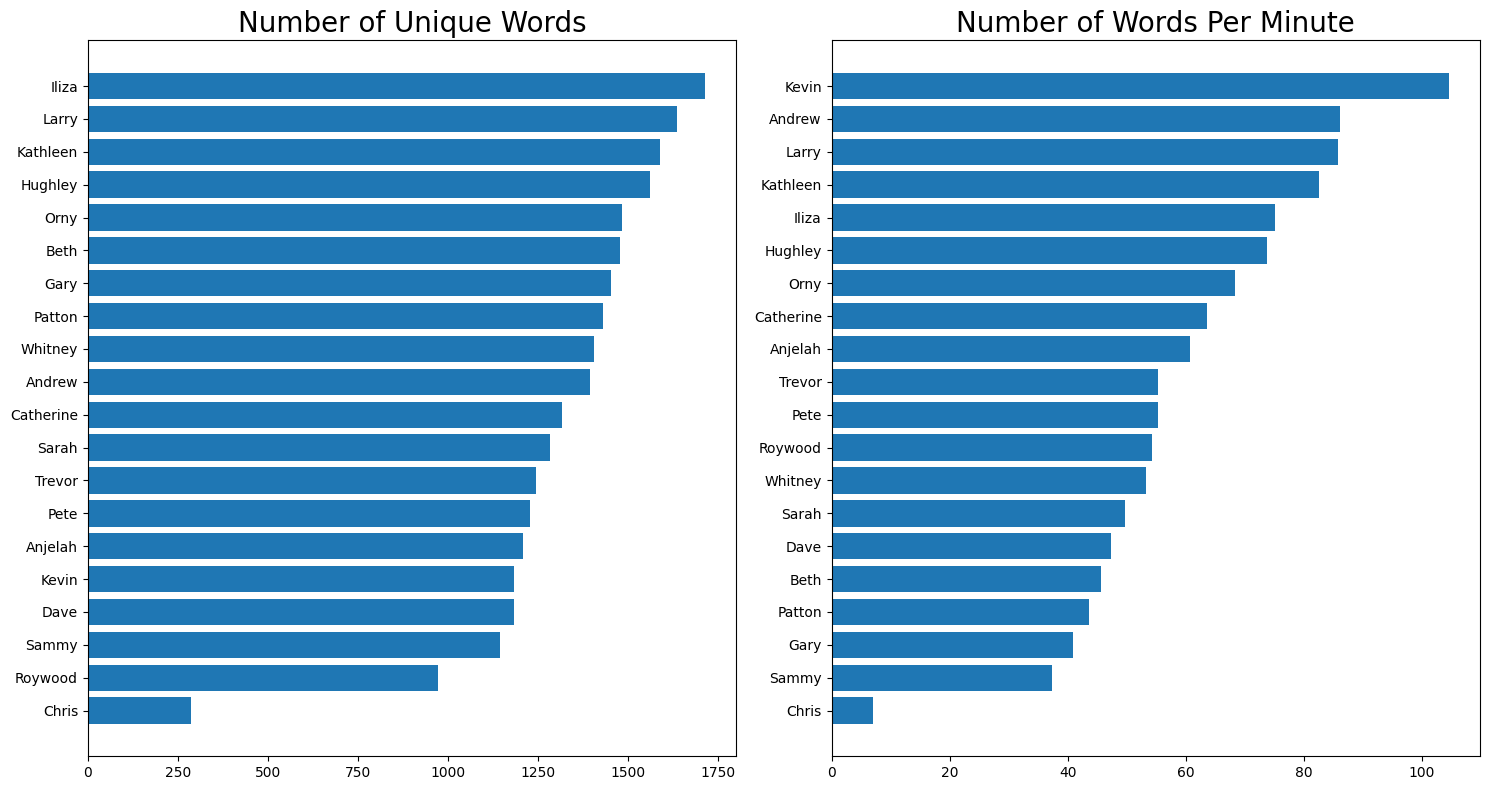

In [34]:
plt.figure(figsize=(15, 8))

y_pos = np.arange(len(data_words))

plt.subplot(1, 2, 1)
plt.barh(y_pos, data_unique_sort.unique_words, align='center')
plt.yticks(y_pos, data_unique_sort.comedian)
plt.title('Number of Unique Words', fontsize=20)

plt.subplot(1, 2, 2)
plt.barh(y_pos, data_wpm_sort.words_per_minute, align='center')
plt.yticks(y_pos, data_wpm_sort.index)
plt.title('Number of Words Per Minute', fontsize=20)

plt.tight_layout()
plt.show()

**Observations:**

* **Vocabulary**
  1. Iliza and Larry have a robust vocabulary, as they employ a plethora of unique words.
  2. As for Chris, exhibits the least vocabularies.
* **Talking Speed**
  1. Kevin and Andrew speak at a brisk pace.
  2. Chris has lowest talking speed as seen from above graph.
* Sarah falls in the middle when it comes to her use of unique words, indicating an average vocabulary. However, she ranks Fourteenth among all comedians in terms of words per minute, delivering 49 words per minute.

In [35]:
Counter(words).most_common()

[('like', 20),
 ('know', 20),
 ('thats', 20),
 ('dont', 20),
 ('im', 19),
 ('just', 19),
 ('got', 18),
 ('youre', 16),
 ('right', 15),
 ('think', 14),
 ('gonna', 13),
 ('want', 12),
 ('people', 12),
 ('time', 12),
 ('okay', 11),
 ('good', 10),
 ('oh', 10),
 ('hes', 10),
 ('yeah', 10),
 ('said', 10),
 ('say', 9),
 ('cause', 9),
 ('theyre', 8),
 ('did', 8),
 ('man', 7),
 ('tell', 7),
 ('shit', 6),
 ('come', 6),
 ('look', 6),
 ('little', 6),
 ('guy', 5),
 ('really', 5),
 ('fuck', 5),
 ('thing', 5),
 ('going', 5),
 ('theres', 5),
 ('love', 5),
 ('fucking', 5),
 ('day', 5),
 ('hey', 4),
 ('uh', 4),
 ('doing', 4),
 ('aint', 4),
 ('white', 4),
 ('didnt', 4),
 ('goes', 4),
 ('guys', 3),
 ('black', 3),
 ('mean', 3),
 ('mom', 3),
 ('woman', 3),
 ('ill', 3),
 ('thank', 3),
 ('god', 3),
 ('ive', 3),
 ('women', 3),
 ('shes', 3),
 ('gay', 2),
 ('trying', 2),
 ('feel', 2),
 ('sex', 2),
 ('ha', 2),
 ('make', 2),
 ('yes', 2),
 ('work', 2),
 ('kids', 2),
 ('yall', 2),
 ('president', 2),
 ('audience', 2)

In [36]:
data_bad_words = Data.transpose()[['fuckin', 'fuck', 'shit', 'fucking']]
data_profanity = pd.concat([data_bad_words.fuckin + data_bad_words.fuck, data_bad_words.shit], axis=1)
data_profanity.columns = ['f_word', 's_word']
data_profanity

f_word  s_word
Andrew         36      54
Anjelah         0       0
Beth            9       0
Catherine      15       8
Chris           0       0
Dave           19      23
Gary            0       2
Hughley        98      94
Iliza           9      14
Kathleen        6       5
Kevin          20      77
Larry           0       1
Orny            0       6
Patton         25      14
Pete           35       8
Roywood         2      17
Sammy           7       8
Sarah           1       4
Trevor          0       2
Whitney        14      24

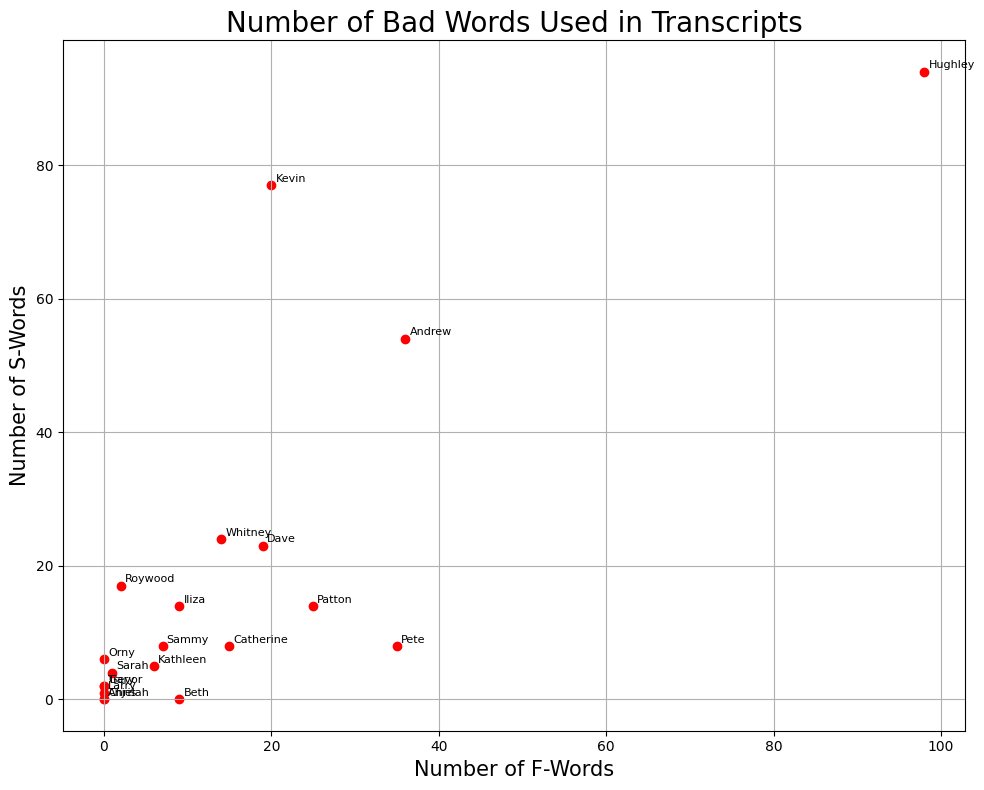

In [37]:
comedian_names = ['Kevin','Pete','Sammy','Dave','Anjelah','Gary','Trevor','Beth','Andrew','Iliza','Hughley','Sarah','Larry','Chris','Roywood','Catherine','Whitney','Kathleen','Orny','Patton']
comedian_names.sort()

plt.figure(figsize=(10, 8))
plt.scatter(data_profanity['f_word'], data_profanity['s_word'], color='red')

for i, comedian in enumerate(comedian_names):
    plt.text(data_profanity['f_word'][i] + 0.5, data_profanity['s_word'][i] + 0.5, comedian, fontsize=8)

plt.title('Number of Bad Words Used in Transcripts', fontsize=20)
plt.xlabel('Number of F-Words', fontsize=15)
plt.ylabel('Number of S-Words', fontsize=15)
plt.grid(True)
plt.tight_layout()
plt.show()

**Insights**
1. As from Above Graph, It appears that D.L. Hughley's stand-up routines feature the frequent use of both the 's-word' and the 'f-word' (Nearly Hundred)
2. Based on the above graph, Anjelah, Larry, Sarah and Trevor use little to no (Zero or almost Zero) swearing in their stand-up routines.
3. I personally don't have any qualms about swear words, so I enjoy listening to stand-up comedy of all varieties. However, it's important to recognize that there are certain individuals or audiences who may feel uncomfortable with the use of such language. This can especially be the case when children are present or when the comedy is being performed in formal settings.
4. Sarah uses fewer swear words and fewer foul language expressions. She appears to be a good person, which I appreciate.

# Sentiment Analysis

In [38]:
data = pd.read_pickle('corpus.pkl')
data

transcript  \
Andrew     Hey, it’s Andrew Santino, and here I am in my hometown, Chicago, Illinois, where I’m shooting my stand-up comedy special, but before I do, I want ...   
Anjelah    Not Fancy was filmed at the City National Grove in Anaheim, California. Anjelah Johnson talks about touring and prepping for her trip to Europe, h...   
Beth       Beth Stelling’s stand-up comedy special, “Girl Daddy,” was released on HBO Max on August 20, 2020. The show was recorded at the Varsity Theater in...   
Catherine  I’m starring in a show! I’m Catherine and I dance very beautiful! [man] Hey, Catherine. [young Catherine laughs] No pictures. No pictures. No pict...   
Chris      Saturday Night Live Season 22: Episode 5\nNovember 2, 1996 …..Chris Rock Chris Rock: What’s up! Good to be back – I live here! So, I guess it’s no...   
Dave       “The Dreamer,” which was shot in Chappelle’s hometown of Washington, D.C., at the Lincoln Theatre, marks Chappelle’s seventh special with Netflix....   
Gary       Gary Gulman’s “Born on 3rd Base” transcends traditional observational comedy, offering an hour-long commentary on poverty and inequality with humo...   
Hughley    [Audience cheering] (DL Hughley enters from stage left with his head cocked and grabs the microphone) Hey now! How yallll doiinnnnnn. How yall doi...   
Iliza      Thank you, Nashville! Thank you. So this year was a really important year for me because I got… Thank you. I appreciate that. I appreciate that re...   
Kathleen   [chattering] [man] Whoo! [chattering] [woman] ♪ Kathleen ♪ ♪ Madigan ♪ ♪ Kathleen ♪ ♪ Madigan ♪ ♪ She’s coming on the stage now ♪ [audience laughs...   
Kevin      Whoa! Yeah, Cleveland. What’s up, Cleveland? How you all feeling? Everybody good? Y’all good? Everybody straight? Cold as shit out this bitch, ain...   
Larry      [Announcer] Ladies and gentlemen, Larry, The Cable Guy! [crowd cheer and applaud] All right. Thank you. Please remain seated. Do not rush the stag...   
Orny       Title: Orny Adams: More Than Loud\nType: Stand-up comedy special\nRelease date: December 1, 2017\nAvailability: You can watch the full special for...   
Patton     [“Hard to Kill” by Bleached plays] [audience cheering and applauding] Hello! Denver! [cheering and applause continues] [Patton laughs] Oh my God! ...   
Pete       Pete Davidson: Turbo Fonzarelli (2024)\nReleased date: January 9, 2024 (Netflix)\nRuntime: 56 min In “Pete Davidson: Turbo Fonzarelli,” released o...   
Roywood    Look, I’m probably not gonna live long enough to teach you everything you need to know, so let’s just run through a couple things real fast. Numbe...   
Sammy      In this stand-up comedy show, Sammy Obeid reflects on his unexpected realization that he might not align with the traditional definition of a libe...   
Sarah      [anthemic classical music playing] [narrator] This story is about Sarah Cooper, who was a morning news anchor from the spring of 2017 to the fall ...   
Trevor     [lively music playing] [announcer] Detroit, give it up… for Trevor Noah! [audience cheering] What’s going on, Detroit? Oh! How you doing tonight, ...   
Whitney    Ladies and gentlemen… Whitney Cummings! This is awesome. I am shooting my fourth stand-up special this evening in my hometown, Washington DC. Than...   

           full_name  
Andrew        Andrew  
Anjelah      Anjelah  
Beth            Beth  
Catherine  Catherine  
Chris          Chris  
Dave            Dave  
Gary            Gary  
Hughley      Hughley  
Iliza          Iliza  
Kathleen    Kathleen  
Kevin          Kevin  
Larry          Larry  
Orny            Orny  
Patton        Patton  
Pete            Pete  
Roywood      Roywood  
Sammy          Sammy  
Sarah          Sarah  
Trevor        Trevor  
Whitney      Whitney

In [39]:
from textblob import TextBlob

pol = lambda x: TextBlob(x).sentiment.polarity
sub = lambda x: TextBlob(x).sentiment.subjectivity

data['polarity'] = data['transcript'].apply(pol)
data['subjectivity'] = data['transcript'].apply(sub)
data

transcript  \
Andrew     Hey, it’s Andrew Santino, and here I am in my hometown, Chicago, Illinois, where I’m shooting my stand-up comedy special, but before I do, I want ...   
Anjelah    Not Fancy was filmed at the City National Grove in Anaheim, California. Anjelah Johnson talks about touring and prepping for her trip to Europe, h...   
Beth       Beth Stelling’s stand-up comedy special, “Girl Daddy,” was released on HBO Max on August 20, 2020. The show was recorded at the Varsity Theater in...   
Catherine  I’m starring in a show! I’m Catherine and I dance very beautiful! [man] Hey, Catherine. [young Catherine laughs] No pictures. No pictures. No pict...   
Chris      Saturday Night Live Season 22: Episode 5\nNovember 2, 1996 …..Chris Rock Chris Rock: What’s up! Good to be back – I live here! So, I guess it’s no...   
Dave       “The Dreamer,” which was shot in Chappelle’s hometown of Washington, D.C., at the Lincoln Theatre, marks Chappelle’s seventh special with Netflix....   
Gary       Gary Gulman’s “Born on 3rd Base” transcends traditional observational comedy, offering an hour-long commentary on poverty and inequality with humo...   
Hughley    [Audience cheering] (DL Hughley enters from stage left with his head cocked and grabs the microphone) Hey now! How yallll doiinnnnnn. How yall doi...   
Iliza      Thank you, Nashville! Thank you. So this year was a really important year for me because I got… Thank you. I appreciate that. I appreciate that re...   
Kathleen   [chattering] [man] Whoo! [chattering] [woman] ♪ Kathleen ♪ ♪ Madigan ♪ ♪ Kathleen ♪ ♪ Madigan ♪ ♪ She’s coming on the stage now ♪ [audience laughs...   
Kevin      Whoa! Yeah, Cleveland. What’s up, Cleveland? How you all feeling? Everybody good? Y’all good? Everybody straight? Cold as shit out this bitch, ain...   
Larry      [Announcer] Ladies and gentlemen, Larry, The Cable Guy! [crowd cheer and applaud] All right. Thank you. Please remain seated. Do not rush the stag...   
Orny       Title: Orny Adams: More Than Loud\nType: Stand-up comedy special\nRelease date: December 1, 2017\nAvailability: You can watch the full special for...   
Patton     [“Hard to Kill” by Bleached plays] [audience cheering and applauding] Hello! Denver! [cheering and applause continues] [Patton laughs] Oh my God! ...   
Pete       Pete Davidson: Turbo Fonzarelli (2024)\nReleased date: January 9, 2024 (Netflix)\nRuntime: 56 min In “Pete Davidson: Turbo Fonzarelli,” released o...   
Roywood    Look, I’m probably not gonna live long enough to teach you everything you need to know, so let’s just run through a couple things real fast. Numbe...   
Sammy      In this stand-up comedy show, Sammy Obeid reflects on his unexpected realization that he might not align with the traditional definition of a libe...   
Sarah      [anthemic classical music playing] [narrator] This story is about Sarah Cooper, who was a morning news anchor from the spring of 2017 to the fall ...   
Trevor     [lively music playing] [announcer] Detroit, give it up… for Trevor Noah! [audience cheering] What’s going on, Detroit? Oh! How you doing tonight, ...   
Whitney    Ladies and gentlemen… Whitney Cummings! This is awesome. I am shooting my fourth stand-up special this evening in my hometown, Washington DC. Than...   

           full_name  polarity  subjectivity  
Andrew        Andrew  0.064888      0.531200  
Anjelah      Anjelah  0.154159      0.469326  
Beth            Beth  0.121103      0.472654  
Catherine  Catherine  0.091647      0.542109  
Chris          Chris  0.057220      0.463048  
Dave            Dave  0.028797      0.540443  
Gary            Gary  0.113113      0.509071  
Hughley      Hughley -0.074797      0.509939  
Iliza          Iliza  0.130229      0.510233  
Kathleen    Kathleen  0.032613      0.488243  
Kevin          Kevin  0.016336      0.516427  
Larry          Larry  0.083295      0.508427  
Orny            Orny  0.075262      0.478211  
Patton        Patton  0.055730      0.505359  


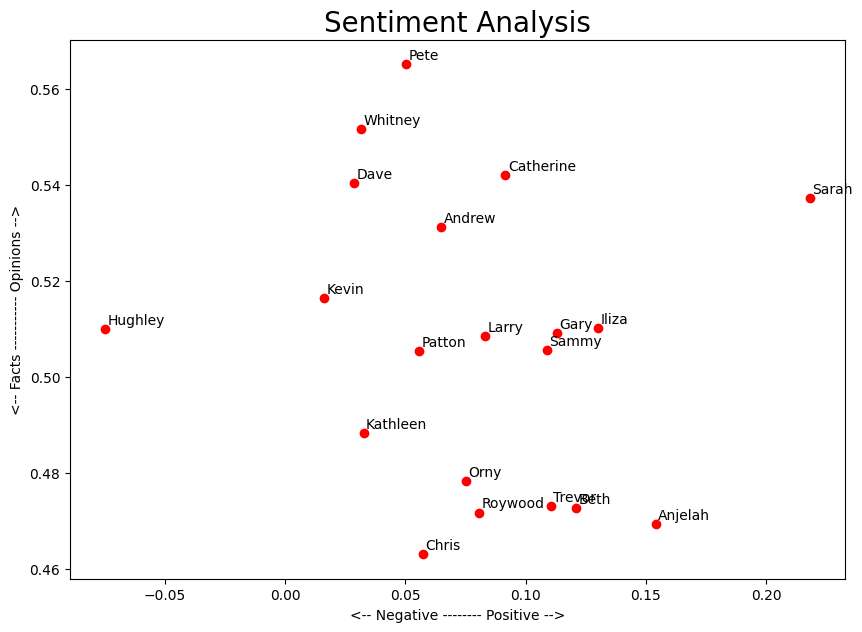

In [40]:
import matplotlib.pyplot as plt

plt.rcParams['figure.figsize'] = [10, 7]

for index, comedian in enumerate(data.index):
    x = data.polarity.loc[comedian]
    y = data.subjectivity.loc[comedian]
    plt.scatter(x, y, color='red')
    plt.text(x+.001, y+.001, data['full_name'][index], fontsize=10)

plt.title('Sentiment Analysis', fontsize=20)
plt.xlabel('<-- Negative -------- Positive -->', fontsize=10)
plt.ylabel('<-- Facts ----------- Opinions -->', fontsize=10)

plt.show()

Both Sarah and Hughley exhibit average tendencies in expressing facts and opinions. However, Sarah tends to use positive words more frequently, whereas Hughley tends to lean towards negative words.

In [41]:
import numpy as np
import math

def split_text(text, n=20):
    length = len(text)
    size = math.floor(length / n)
    start = np.arange(0, length, size)

    split_list = []
    for piece in range(n):
        split_list.append(text[start[piece]:start[piece]+size])
    return split_list

In [42]:
list_pieces = []
for t in data.transcript:
    split = split_text(t)
    list_pieces.append(split)

list_pieces

[['Hey, it’s Andrew Santino, and here I am in my hometown, Chicago, Illinois, where I’m shooting my stand-up comedy special, but before I do, I want to take you around my city, and I want to show you the gems that people don’t talk about, locals-only type of stuff. Hey, excuse me. Can I get a ride? No. Okay. Fair enough. Chicago. Well, I have a meeting, and I don’t know you. It’s fine. I get that. Why should I even… You know, that’s an odd question to ask. You’re right. Now that I think about it… In the city here, with all the crime and everything, – just hop in and get a ride? You’re right. Best city in the world, baby… Chicago. Boom, a local spot… Willis Tower, on the corner, of course, of Jackson and Wacker. Now, Jackson and Wacker is famous ’cause of Andrew Jackson and because people used to get whacked. Right below me, the Chicago Pond, a beautiful piece of water. People swim in here. Olympics train in this thing. Jordan actually was inside the mold when they molded him. They crac

In [43]:
len(list_pieces)

20

In [44]:
len(list_pieces[0])

20

In [45]:
polarity_transcript = []
for lp in list_pieces:
    polarity_piece = []
    for p in lp:
        polarity_piece.append(TextBlob(p).sentiment.polarity)
    polarity_transcript.append(polarity_piece)

polarity_transcript

[[0.25067554799697656,
  0.06065207156308849,
  0.20766061589925225,
  -0.21471220137886807,
  0.1687888739612878,
  0.07708950406318833,
  0.08302808302808302,
  0.02430572572082007,
  0.12548226433430512,
  0.16780303030303026,
  -0.023825720764496277,
  0.024160613397901542,
  0.04505494505494507,
  -0.013335866261398162,
  0.15417833800186742,
  -0.11206266534391542,
  0.10346019721019724,
  0.02105654761904761,
  -0.03929694519317162,
  0.1408635723173767],
 [0.1631834215167548,
  0.20756891575857092,
  0.14095904095904094,
  0.24889030612244897,
  0.1354978354978355,
  0.15284391534391534,
  0.17320238095238094,
  0.18708513708513708,
  0.2171428571428571,
  0.2451530612244898,
  0.22111801242236023,
  0.0939194904712146,
  0.1335825027685493,
  0.2889180672268906,
  0.18189153439153435,
  0.006763468013468004,
  0.24562864671560322,
  0.002194343646549504,
  0.06235119047619047,
  0.008883735312306757],
 [0.18176020408163263,
  0.10717652717652719,
  0.1364195526695527,
  0.1906

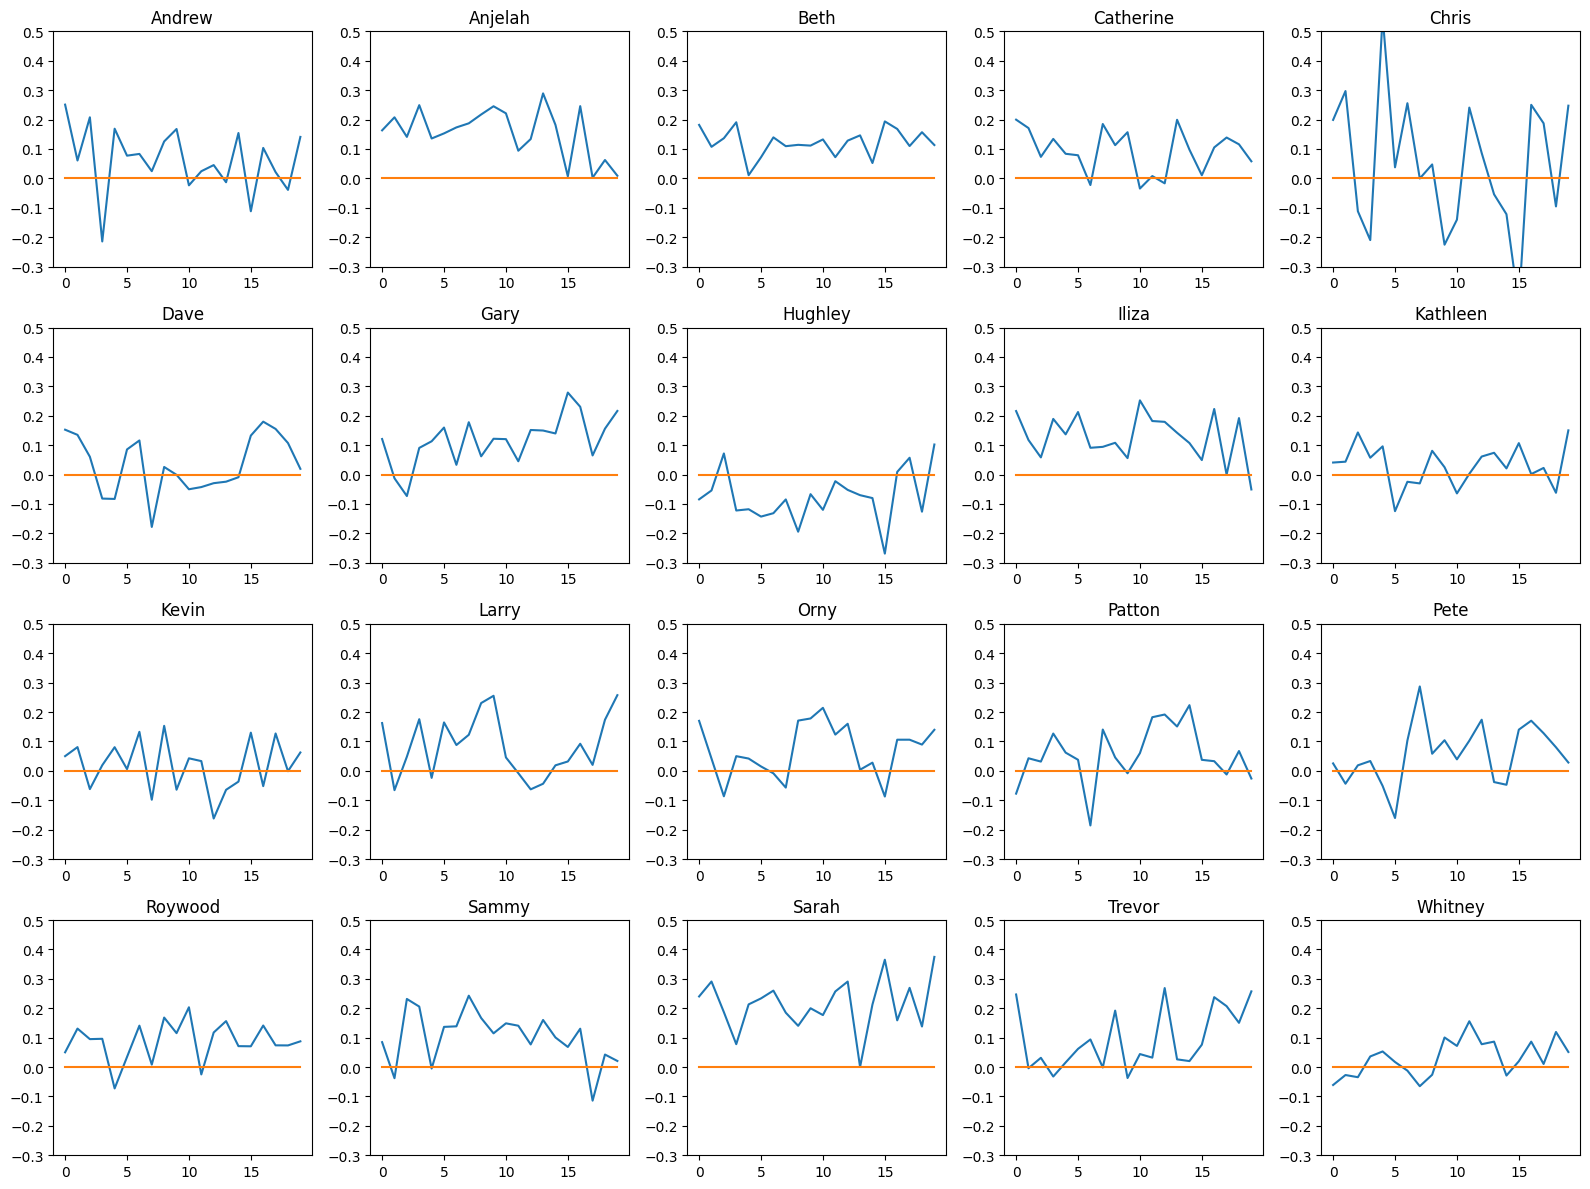

In [46]:
plt.rcParams['figure.figsize'] = [16, 12]

for index, comedian in enumerate(data.index):
    plt.subplot(4, 5, index+1)
    plt.plot(polarity_transcript[index])
    plt.plot(np.arange(0, 20), np.zeros(20))
    plt.title(data['full_name'][index])
    plt.ylim(bottom=-0.3, top=0.5)

plt.tight_layout()
plt.show()

**Sarah** remains positive throughout routine whereas **Hughley** generally remains negative throughout routine

# **Topic Modeling**

Basically, we try to predict that what topics are being discussed by each comedian and technique used is Latent Dirichlet Allocation (based on probability distribution)

In [47]:
import pandas as pd
import pickle

data = pd.read_pickle('dtm_stop.pkl')
data

aa  aaaaaah  aah  abandoned  abbreviated  abducted  abduction  \
Andrew      0        0    1          0            0         0          0   
Anjelah     0        0    0          0            0         0          0   
Beth        0        0    0          0            0         0          0   
Catherine   0        0    0          0            0         0          0   
Chris       0        0    0          0            0         0          0   
Dave        0        0    1          0            0         0          0   
Gary        2        0    0          0            0         0          0   
Hughley     0        0    0          0            0         0          1   
Iliza       0        0    0          0            0         0          0   
Kathleen    0        0    0          0            0         1          0   
Kevin       0        1    1          0            0         0          0   
Larry       0        0    1          0            0         0          0   
Orny        0        0    0          0            3         0          0   
Patton      0        0    0          0            0         0          0   
Pete        0        0    1          0            0         0          0   
Roywood     0        0    0          0            0         0          0   
Sammy       0        0    0          0            0         0          0   
Sarah       0        0    0          1            0         0          0   
Trevor      0        0    0          0            0         0          0   
Whitney     0        0    0          0            0         0          0   

           abhor  abhorring  abide  ...  ziploced  ziplock  zipper  zipping  \
Andrew         0          0      0  ...         0        0       0        0   
Anjelah        0          0      0  ...         0        0       0        0   
Beth           0          0      0  ...         0        0       0        0   
Catherine      2          0      0  ...         0        0       0        0   
Chris          0          0      0  ...         0        0       0        0   
Dave           0          0      0  ...         0        0       0        0   
Gary           0          0      1  ...         0        0       0        0   
Hughley        0          0      0  ...         0        0       0        0   
Iliza          0          0      0  ...         0        0       0        0   
Kathleen       0          1      0  ...         0        0       0        0   
Kevin          0          0      0  ...         0        0       0        0   
Larry          0          0      0  ...         0        1       0        1   
Orny           0          0      0  ...         0        0       1        0   
Patton         0          0      0  ...         0        0       0        0   
Pete           0          0      0  ...         1        0       0        0   
Roywood        0          0      0  ...         0        0       0        0   
Sammy          0          0      0  ...         0        0       0        0   
Sarah          0          0      0  ...         0        0       0        0   
Trevor         0          0      0  ...         0        0       0        0   
Whitney        0          0      0  ...         0        0       0        0   

           zit  zombie  zone  zoo  zoom  zorb  
Andrew       0       0     2    0     0     1  
Anjelah      0       0     0    0     0     0  
Beth         0       0     0    0     0     0  
Catherine    1       0     0    0     0     0  
Chris        0       0     0    0     0     0  
Dave         0       0     0    0     0     0  
Gary         0       0     0    0     0     0  
Hughley      0       0     0    0     0     0  
Iliza        0       1     0    0     0     0  
Kathleen     0       0     0    0     0     0  
Kevin        0       0     0    0     0     0  
Larry        0       0     0    0     0     0  
Orny         0       0     0    0     1     0  
Patton       0       0     0    0     2     0  
Pete         0       0     1    0 

In [48]:
from gensim import matutils, models
import scipy.sparse

In [49]:
tdm = data.transpose()
tdm.head()

Andrew  Anjelah  Beth  Catherine  Chris  Dave  Gary  Hughley  \
aa                0        0     0          0      0     0     2        0   
aaaaaah           0        0     0          0      0     0     0        0   
aah               1        0     0          0      0     1     0        0   
abandoned         0        0     0          0      0     0     0        0   
abbreviated       0        0     0          0      0     0     0        0   

             Iliza  Kathleen  Kevin  Larry  Orny  Patton  Pete  Roywood  \
aa               0         0      0      0     0       0     0        0   
aaaaaah          0         0      1      0     0       0     0        0   
aah              0         0      1      1     0       0     1        0   
abandoned        0         0      0      0     0       0     0        0   
abbreviated      0         0      0      0     3       0     0        0   

             Sammy  Sarah  Trevor  Whitney  
aa               0      0       0        0  
aaaaaah          0      0       0        0  
aah              0      0       0        0  
abandoned        0      1       0        0  
abbreviated      0      0       0        0

In [50]:
sparse_counts = scipy.sparse.csr_matrix(tdm)
corpus = matutils.Sparse2Corpus(sparse_counts)

In [51]:
cv = pickle.load(open("cv_stop.pkl", "rb"))
id2word = dict((v, k) for k, v in cv.vocabulary_.items()) # Having vocabulary

In [52]:
lda = models.LdaModel(corpus=corpus, id2word=id2word, num_topics=2, passes=30)
lda.print_topics()

[(0,
  '0.007*"shit" + 0.006*"fuck" + 0.005*"fucking" + 0.004*"goes" + 0.004*"come" + 0.004*"aint" + 0.004*"didnt" + 0.004*"going" + 0.004*"guy" + 0.004*"shes"'),
 (1,
  '0.010*"audience" + 0.007*"look" + 0.006*"laughing" + 0.005*"going" + 0.004*"didnt" + 0.004*"really" + 0.004*"love" + 0.004*"come" + 0.004*"little" + 0.004*"ive"')]

In [53]:
lda = models.LdaModel(corpus=corpus, id2word=id2word, num_topics=3, passes=30)
lda.print_topics()

[(0,
  '0.010*"shit" + 0.006*"fuck" + 0.006*"didnt" + 0.005*"look" + 0.005*"aint" + 0.005*"come" + 0.005*"hey" + 0.005*"yall" + 0.004*"god" + 0.004*"black"'),
 (1,
  '0.008*"goes" + 0.005*"shes" + 0.005*"uh" + 0.004*"little" + 0.004*"fucking" + 0.004*"mom" + 0.004*"went" + 0.004*"day" + 0.004*"thing" + 0.004*"going"'),
 (2,
  '0.010*"audience" + 0.007*"laughing" + 0.006*"look" + 0.006*"going" + 0.005*"love" + 0.005*"guy" + 0.005*"really" + 0.004*"theres" + 0.004*"make" + 0.004*"ive"')]

In [54]:
lda = models.LdaModel(corpus=corpus, id2word=id2word, num_topics=4, passes=30)
lda.print_topics()

[(0,
  '0.006*"sarah" + 0.004*"really" + 0.004*"ive" + 0.004*"going" + 0.004*"little" + 0.003*"thought" + 0.003*"nice" + 0.003*"come" + 0.003*"make" + 0.003*"look"'),
 (1,
  '0.022*"audience" + 0.015*"laughing" + 0.009*"look" + 0.007*"applauding" + 0.005*"guy" + 0.005*"didnt" + 0.005*"ill" + 0.004*"day" + 0.004*"love" + 0.004*"goes"'),
 (2,
  '0.008*"shit" + 0.006*"look" + 0.005*"going" + 0.005*"come" + 0.005*"women" + 0.005*"didnt" + 0.004*"fuck" + 0.004*"hey" + 0.004*"love" + 0.004*"white"'),
 (3,
  '0.007*"fuck" + 0.007*"guy" + 0.006*"fucking" + 0.006*"goes" + 0.006*"shit" + 0.005*"really" + 0.005*"shes" + 0.004*"going" + 0.004*"guys" + 0.004*"theres"')]

Even on increasing the number of topics and running multiple iterations, Words such as audience, laughing and others are repeated across different topics, indicating that these terms might not be effectively distinguishing between topics.

In [55]:
from nltk import word_tokenize, pos_tag

def nouns(text):
    is_noun = lambda pos: pos[:2] == 'NN'
    tokenized = word_tokenize(text)
    all_nouns = [word for (word, pos) in pos_tag(tokenized) if is_noun(pos)]
    return ' '.join(all_nouns)

In [56]:
data_clean = pd.read_pickle('data_clean.pkl')
data_clean

transcript
Andrew     hey its andrew santino and here i am in my hometown chicago illinois where im shooting my standup comedy special but before i do i want to take yo...
Anjelah    not fancy was filmed at the city national grove in anaheim california anjelah johnson talks about touring and prepping for her trip to europe her ...
Beth       beth stellings standup comedy special girl daddy was released on hbo max on august   the show was recorded at the varsity theater in minneapolis m...
Catherine  im starring in a show im catherine and i dance very beautiful  hey catherine  no pictures no pictures no pictures well im just gonna walk into the...
Chris      saturday night live season  episode november   chris rock chris rock whats up good to be back  i live here so i guess its not good to be back its ...
Dave       the dreamer which was shot in chappelles hometown of washington dc at the lincoln theatre marks chappelles seventh special with netflix stan latha...
Gary       gary gulmans born on  base transcends traditional observational comedy offering an hourlong commentary on poverty and inequality with humor and un...
Hughley     dl hughley enters from stage left with his head cocked and grabs the microphone hey now how yallll doiinnnnnn how yall doin chocolate city goddam...
Iliza      thank you nashville thank you so this year was a really important year for me because i got thank you i appreciate that i appreciate that reciproc...
Kathleen     whoo    kathleen   madigan   kathleen   madigan   shes coming on the stage now    shes gonna be here shortly   she even put some pants on   at l...
Kevin      whoa yeah cleveland whats up cleveland how you all feeling everybody good yall good everybody straight cold as shit out this bitch aint it i dont ...
Larry       ladies and gentlemen larry the cable guy  all right thank you please remain seated do not rush the stage thank you well this is awesome who cance...
Orny       title orny adams more than loudtype standup comedy specialrelease date december  availability you can watch the full special for free on youtube o...
Patton       hello denver   oh my god hello thank you thank you thank you  thank you oh my god yes thank you all so much for coming out tonight um hey i brok...
Pete       pete davidson turbo fonzarelli released date january   netflixruntime  min in pete davidson turbo fonzarelli released on january   on netflix davi...
Roywood    look im probably not gonna live long enough to teach you everything you need to know so lets just run through a couple things real fast number one...
Sammy      in this standup comedy show sammy obeid reflects on his unexpected realization that he might not align with the traditional definition of a libera...
Sarah        this story is about sarah cooper who was a morning news anchor from the spring of  to the fall of  at her peak cooper had a hut rating of  and a...
Trevor       detroit give it up for trevor noah  whats going on detroit oh how you doing tonight everybody how you doing welcome to the show thank you so muc...
Whitney    ladies and gentlemen whitney cummings this is awesome i am shooting my fourth standup special this evening in my hometown washington dc thank you ...

In [57]:
import nltk
nltk.download('averaged_perceptron_tagger')

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


True

In [58]:
# Nouns are being filtered
data_nouns = pd.DataFrame(data_clean.transcript.apply(nouns))
data_nouns

transcript
Andrew     andrew santino chicago illinois im standup comedy city i gems people talk type stuff hey ride meeting i fine i thats question youre i city crime e...
Anjelah    fancy city grove california anjelah johnson talks trip wardrobe jewelry collection marriage course family following transcript show ladies gentlem...
Beth       stellings comedy girl daddy hbo max show varsity theater minneapolis minnesota beth stelling comedian industry decade comedy style girl daddy talk...
Catherine  im show catherine dance hey pictures pictures tv thats i ha ha ha ha ha ha ha ha ha ha ha ha ha ha ha ha ha ha ha ha ha i thats yes thank thank yo...
Chris      night season chris rock chris rock guess good alma mater lot things couple years commercials standup road tour kid america youd grandma town malls...
Dave       dreamer chappelles hometown washington dc lincoln theatre marks stan lathan chappelles specials streamer returns dreamer specials age deep heart e...
Gary       gulmans base transcends comedy commentary poverty inequality humor candor grandeur torontos gulman transforms experiences critiques treatment narr...
Hughley    dl hughley enters stage head microphone hey chocolate city goddamn people round applause thats audience man doctor motherfucker show look people e...
Iliza      thank year year i i reciprocity i something positivity i i thats women share news people women note something i i platform usage word amazing voca...
Kathleen   whoo kathleen madigan shes stage gon pants cause shes kathleen madigan pants ladies gentlemen stage thank thank hand opening act mr hand jann arde...
Kevin      whoa yeah cleveland everybody everybody shit bitch aint snow yall damn theres slush i aint aint year yall i shouts foot shouts man showing cavs ma...
Larry      ladies gentlemen cable guy thank stage thank thank crowd ill barrels regulars look thats time im hey im glad i colonoscopy deal folks illinois ill...
Orny       title comedy specialrelease date december availability special youtube loud comedy vibrant approach adams showtime venture specials appearances pl...
Patton     hello denver god hey i foot yeah year i foot parts part curb i part part part i everythings fatal i i twenties propellers bactine i pine cone spin...
Pete       davidson turbo fonzarelli date netflixruntime min davidson turbo fonzarelli january davidsons comedy crossroads journey necessity drugs anecdotes ...
Roywood    look im everything things number i women respect number liquor back police car speaking friend men friends police stare thats youre gon stuff man ...
Sammy      comedy show obeid realization definition identities experiences berkeley stance impact education worldview obeid topics race correctness heritage ...
Sarah      story cooper morning news anchor spring fall cooper hut rating audience share shes mind time words everythings name morning show day everythings e...
Trevor     trevor noah detroit everybody show thank look night feeling fun life day place feeling mmm taste season mmmmmmmmm cause america day day day time i...
Whitney    ladies gentlemen cummings i special evening washington dc thank lots i year i people harassment harassment news guy friends anyone friends idea of...

In [59]:
from sklearn.feature_extraction.text import CountVectorizer
import pandas as pd

add_stop_words = ['like', 'im', 'know', 'just', 'dont', 'thats', 'right', 'people',
                  'youre', 'got', 'gonna', 'time', 'think', 'yeah', 'said']
stop_words = list(text.ENGLISH_STOP_WORDS.union(add_stop_words))

cvn = CountVectorizer(stop_words=stop_words)
data_cvn = cvn.fit_transform(data_nouns.transcript)
data_dtmn = pd.DataFrame(data_cvn.toarray(), columns=cvn.get_feature_names_out())
data_dtmn.index = data_nouns.index
data_dtmn
# Therefore, recreating Document Term Matrix

aaaaaah  aah  abduction  ability  aboard  abortion  abracadabra  \
Andrew           0    1          0        0       0         0            0   
Anjelah          0    0          0        0       0         0            0   
Beth             0    0          0        0       0         5            0   
Catherine        0    0          0        0       0         0            0   
Chris            0    0          0        0       0         0            0   
Dave             0    1          0        0       0         0            0   
Gary             0    0          0        0       0         0            1   
Hughley          0    0          1        0       0         3            0   
Iliza            0    0          0        0       0         0            0   
Kathleen         0    0          0        0       0         0            0   
Kevin            1    0          0        0       0         0            0   
Larry            0    0          0        0       0         0            0   
Orny             0    0          0        0       0         0            0   
Patton           0    0          0        0       0         0            0   
Pete             0    1          0        1       0         0            0   
Roywood          0    0          0        0       1         0            0   
Sammy            0    0          0        0       0         1            0   
Sarah            0    0          0        0       0         0            0   
Trevor           0    0          0        0       0         0            0   
Whitney          0    0          0        2       0         0            0   

           abraham  absence  absolute  ...  zipline  ziploc  ziplock  zipper  \
Andrew           0        0         0  ...        1       0        0       0   
Anjelah          0        0         0  ...        0       0        0       0   
Beth             0        0         0  ...        0       0        0       0   
Catherine        0        0         0  ...        0       0        0       0   
Chris            0        0         0  ...        0       0        0       0   
Dave             0        0         0  ...        0       0        0       0   
Gary             0        0         0  ...        0       0        0       0   
Hughley          0        0         0  ...        0       0        0       0   
Iliza            0        0         1  ...        0       0        0       0   
Kathleen         1        0         0  ...        0       0        0       0   
Kevin            0        0         0  ...        0       0        0       0   
Larry            0        0         0  ...        0       0        1       0   
Orny             0        0         0  ...        0       1        0       1   
Patton           0        0         0  ...        0       0        0       0   
Pete             0        0         0  ...        0       0        0       0   
Roywood          0        1         0  ...        0       0        0       0   
Sammy            0        0         0  ...        0       0        0       0   
Sarah            0        0         0  ...        0       0        0       0   
Trevor           0        0         0  ...        0       0        0       0   
Whitney          0        0         0  ...        0       0        0       0   

           zipping  zit  zombie  zone  zoo  zoom  
Andrew           0    0       0     2    0     0  
Anjelah          0    0       0     0    0     0  
Beth             0    0       0     0    0     0  
Catherine        0    1       0     0    0     0  
Chris            0    0       0     0    0     0  
Dave             0    0       0     0    0     0  
Gary             0    0       0     0    0     0  
Hughley          0    0       0     0    0     0  
Iliza            0    0       1     0    0     0  
Kathleen         0    0       0     0    0     0  
Kevin            0    0       0     0    0     0  
Larry            1    0       0     0    0     0  
Orny             0    0     

In [60]:
corpusn = matutils.Sparse2Corpus(scipy.sparse.csr_matrix(data_dtmn.transpose()))

id2wordn = dict((v, k) for k, v in cvn.vocabulary_.items())

In [61]:
ldan = models.LdaModel(corpus=corpusn, num_topics=2, id2word=id2wordn, passes=30)
ldan.print_topics()

[(0,
  '0.025*"audience" + 0.011*"man" + 0.008*"women" + 0.006*"shit" + 0.006*"woman" + 0.005*"guy" + 0.005*"way" + 0.005*"fuck" + 0.005*"hes" + 0.005*"day"'),
 (1,
  '0.012*"man" + 0.009*"cause" + 0.009*"thing" + 0.009*"gon" + 0.008*"day" + 0.008*"guy" + 0.008*"hes" + 0.006*"way" + 0.006*"shit" + 0.005*"lot"')]

In [62]:
ldan = models.LdaModel(corpus=corpusn, num_topics=3, id2word=id2wordn, passes=30)
ldan.print_topics()

[(0,
  '0.008*"gon" + 0.008*"day" + 0.007*"cause" + 0.006*"guy" + 0.006*"way" + 0.006*"house" + 0.005*"hes" + 0.005*"mom" + 0.005*"thing" + 0.005*"lot"'),
 (1,
  '0.018*"man" + 0.009*"shit" + 0.008*"thing" + 0.008*"cause" + 0.007*"hes" + 0.007*"gon" + 0.006*"way" + 0.006*"guy" + 0.006*"day" + 0.005*"fuck"'),
 (2,
  '0.062*"audience" + 0.011*"guy" + 0.011*"women" + 0.006*"day" + 0.005*"robots" + 0.005*"way" + 0.005*"robot" + 0.005*"years" + 0.005*"thing" + 0.004*"laughing"')]

In [63]:
ldan = models.LdaModel(corpus=corpusn, num_topics=4, id2word=id2wordn, passes=30)
ldan.print_topics()

[(0,
  '0.022*"audience" + 0.011*"man" + 0.010*"guy" + 0.007*"cause" + 0.007*"thing" + 0.007*"way" + 0.007*"women" + 0.006*"hes" + 0.005*"day" + 0.005*"okay"'),
 (1,
  '0.011*"man" + 0.010*"day" + 0.009*"hes" + 0.009*"gon" + 0.009*"thing" + 0.009*"cause" + 0.007*"kids" + 0.007*"mom" + 0.007*"hey" + 0.006*"shit"'),
 (2,
  '0.012*"man" + 0.010*"fuck" + 0.010*"shit" + 0.007*"president" + 0.007*"gon" + 0.006*"woman" + 0.006*"hughley" + 0.005*"god" + 0.005*"way" + 0.005*"sarah"'),
 (3,
  '0.013*"man" + 0.009*"dude" + 0.006*"thing" + 0.006*"song" + 0.005*"cause" + 0.005*"movie" + 0.005*"folks" + 0.004*"captain" + 0.004*"gon" + 0.004*"america"')]

* Compared to the previous observations, Improved Topic Clarity with Nouns.
* Repetitive words like "okay" and "say" have been replaced by more concrete nouns like "audience" and "man,"
* The word "audience" appears prominently across multiple topics, indicating a consistent focus on interactions or reactions from the audience.
* Nouns like "man," "guy," and "hes" imply discussions about gender.

In [64]:
def nouns_adj(text):
    is_noun_adj = lambda pos: pos[:2] == 'NN' or pos[:2] == 'JJ'
    tokenized = word_tokenize(text)
    nouns_adj = [word for (word, pos) in pos_tag(tokenized) if is_noun_adj(pos)]
    return ' '.join(nouns_adj)

In [65]:
data_nouns_adj = pd.DataFrame(data_clean.transcript.apply(nouns_adj))
data_nouns_adj

transcript
Andrew     andrew santino i hometown chicago illinois im standup comedy special i city i gems people talk type stuff hey ride okay fair meeting i fine i that...
Anjelah    fancy city national grove anaheim california anjelah johnson talks trip teeninspired wardrobe jewelry collection marriage course family following ...
Beth       beth stellings comedy special girl daddy hbo max show varsity theater minneapolis minnesota beth stelling comedian industry decade comedy style hi...
Catherine  im show im catherine i dance beautiful hey pictures pictures tv yeah thats i ha ha ha ha ha ha ha ha ha ha ha ha ha ha ha ha ha ha ha ha ha i insa...
Chris      saturday night season episode november chris rock chris rock good i i guess good good alma mater ive lot things last couple years commercials penn...
Dave       dreamer chappelles hometown washington dc lincoln theatre marks seventh special netflix stan lathan chappelles other specials streamer returns dre...
Gary       gary gulmans base transcends traditional observational comedy hourlong commentary poverty inequality humor unwavering candor grandeur torontos gre...
Hughley    dl hughley enters stage head microphone hey yallll yall doin chocolate city goddamn good people round applause thats mixed audience man doctor nex...
Iliza      thank year important year i i reciprocity i something positive positivity i i married like thats great old women afraid share good personal news p...
Kathleen   whoo kathleen madigan madigan shes stage gon pants least i cause shes professional kathleen madigan pants professional ladies gentlemen stage kath...
Kevin      whoa yeah cleveland everybody good good everybody shit bitch aint snow yall slushy snow hey god damn slush theres slush i aint i aint good year ya...
Larry      ladies gentlemen cable guy right thank seated stage thank awesome thank crowd ill cracker barrels regulars right look good joliet thats first time...
Orny       title orny more loudtype standup comedy specialrelease date december availability full special free youtube orny more loud standup comedy special ...
Patton     hello denver god god much tonight hey i foot yeah i year i foot parts second part i curb i wrong second part first important part i crucial part i...
Pete       pete davidson turbo fonzarelli date january netflixruntime min pete davidson turbo fonzarelli january netflix davidsons comedy special crossroads ...
Roywood    look im everything couple things real fast number i women respect right respectful number dont white dark liquor back police car speaking white fr...
Sammy      standup comedy show sammy obeid unexpected realization traditional definition liberal political social identities experiences uc berkeley progress...
Sarah      story sarah cooper morning news anchor spring fall peak cooper hut rating audience share shes mind time words everythings name morning show fine b...
Trevor     trevor noah detroit tonight everybody welcome show thank much look night feeling detroit ive im im more fun life i ive im ive day i place differen...
Whitney    ladies gentlemen cummings awesome i fourth standup special evening hometown washington dc thank lots i standup special lots past year i people sex...

In [66]:
from sklearn.feature_extraction.text import CountVectorizer
import pandas as pd

add_stop_words = ['like', 'im', 'know', 'just', 'dont', 'thats', 'right', 'people',
                  'youre', 'got', 'gonna', 'time', 'think', 'yeah', 'said']
stop_words = list(text.ENGLISH_STOP_WORDS.union(add_stop_words))

# Recreate a document-term matrix with only nouns and adjectives
cvna = CountVectorizer(stop_words=stop_words, max_df=.8)
data_cvna = cvna.fit_transform(data_nouns_adj.transcript)
data_dtmna = pd.DataFrame(data_cvna.toarray(), columns=cvna.get_feature_names_out())
data_dtmna.index = data_nouns_adj.index
data_dtmna

aa  aaaaaah  aah  abbreviated  abduction  ability  able  aboard  \
Andrew      0        0    1            0          0        0     2       0   
Anjelah     0        0    0            0          0        0     1       0   
Beth        0        0    0            0          0        0     1       0   
Catherine   0        0    0            0          0        0     0       0   
Chris       0        0    0            0          0        0     0       0   
Dave        0        0    1            0          0        0     0       0   
Gary        2        0    0            0          0        0     1       0   
Hughley     0        0    0            0          1        0     0       0   
Iliza       0        0    0            0          0        0     0       0   
Kathleen    0        0    0            0          0        0     1       0   
Kevin       0        1    1            0          0        0     0       0   
Larry       0        0    0            0          0        0     3       0   
Orny        0        0    0            1          0        0     2       0   
Patton      0        0    0            0          0        0     2       0   
Pete        0        0    1            0          0        1     1       0   
Roywood     0        0    0            0          0        0     0       1   
Sammy       0        0    0            0          0        0     2       0   
Sarah       0        0    0            0          0        0     3       0   
Trevor      0        0    0            0          0        0     1       0   
Whitney     0        0    0            0          0        2     3       0   

           abortion  abra  ...  zipline  ziploc  ziplock  zipper  zipping  \
Andrew            0     0  ...        1       0        0       0        0   
Anjelah           0     0  ...        0       0        0       0        0   
Beth              5     0  ...        0       0        0       0        0   
Catherine         0     0  ...        0       0        0       0        0   
Chris             0     0  ...        0       0        0       0        0   
Dave              0     0  ...        0       0        0       0        0   
Gary              0     0  ...        0       0        0       0        0   
Hughley           3     0  ...        0       0        0       0        0   
Iliza             0     0  ...        0       0        0       0        0   
Kathleen          0     0  ...        0       0        0       0        0   
Kevin             0     0  ...        0       0        0       0        0   
Larry             0     0  ...        0       0        1       0        1   
Orny              0     0  ...        0       1        0       1        0   
Patton            0     1  ...        0       0        0       0        0   
Pete              0     0  ...        0       0        0       0        0   
Roywood           0     0  ...        0       0        0       0        0   
Sammy             1     0  ...        0       0        0       0        0   
Sarah             0     0  ...        0       0        0       0        0   
Trevor            0     0  ...        0       0        0       0        0   
Whitney           0     0  ...        0       0        0       0        0   

           zit  zombie  zone  zoo  zoom  
Andrew       0       0     2    0     0  
Anjelah      0       0     0    0     0  
Beth         0       0     0    0     0  
Catherine    1       0     0    0     0  
Chris        0       0     0    0     0  
Dave         0       0     0    0     0  
Gary         0       0     0    0     0  
Hughley      0       0     0    0     0  
Iliza        0       1     0    0     0  
Kathleen     0       0     0    0     0  
Kevin        0       0     0    0     0  
Larry        0       0     0    0     0  
Orny         0       0     0    0     0  
Patton       0       0     0    0     2  
Pete         0       0     1    0     1  
Roywood      0       0     0    0     0  
Sammy        0       0     0    0     0 

In [67]:
corpusna = matutils.Sparse2Corpus(scipy.sparse.csr_matrix(data_dtmna.transpose()))

id2wordna = dict((v, k) for k, v in cvna.vocabulary_.items())

In [68]:
ldana = models.LdaModel(corpus=corpusna, num_topics=2, id2word=id2wordna, passes=30)
ldana.print_topics()

[(0,
  '0.007*"women" + 0.004*"mom" + 0.003*"house" + 0.003*"fuck" + 0.003*"guys" + 0.003*"men" + 0.003*"uh" + 0.003*"food" + 0.003*"sex" + 0.003*"kid"'),
 (1,
  '0.006*"black" + 0.006*"fuck" + 0.004*"car" + 0.004*"ass" + 0.004*"bitch" + 0.003*"country" + 0.003*"uh" + 0.003*"house" + 0.003*"yall" + 0.003*"dude"')]

In [69]:
ldana = models.LdaModel(corpus=corpusna, num_topics=3, id2word=id2wordna, passes=30)
ldana.print_topics()

[(0,
  '0.005*"black" + 0.004*"mom" + 0.004*"fuck" + 0.004*"house" + 0.003*"sarah" + 0.003*"nice" + 0.003*"song" + 0.003*"uh" + 0.003*"america" + 0.003*"ta"'),
 (1,
  '0.006*"women" + 0.004*"pussy" + 0.004*"food" + 0.003*"uh" + 0.003*"men" + 0.003*"husband" + 0.003*"stuff" + 0.003*"crowd" + 0.003*"wedding" + 0.003*"joke"'),
 (2,
  '0.008*"fuck" + 0.007*"women" + 0.005*"black" + 0.005*"bitch" + 0.005*"guys" + 0.004*"car" + 0.004*"yall" + 0.004*"ass" + 0.004*"house" + 0.004*"stuff"')]

In [70]:
ldana = models.LdaModel(corpus=corpusna, num_topics=4, id2word=id2wordna, passes=30)
ldana.print_topics()

[(0,
  '0.012*"fuck" + 0.007*"bitch" + 0.007*"mom" + 0.006*"yall" + 0.006*"ass" + 0.005*"black" + 0.005*"hughley" + 0.005*"car" + 0.005*"aint" + 0.004*"women"'),
 (1,
  '0.014*"women" + 0.009*"robot" + 0.008*"robots" + 0.008*"guys" + 0.007*"sex" + 0.006*"ha" + 0.005*"men" + 0.004*"human" + 0.003*"car" + 0.003*"fuck"'),
 (2,
  '0.005*"black" + 0.004*"country" + 0.004*"dude" + 0.004*"sarah" + 0.003*"pussy" + 0.003*"america" + 0.003*"nice" + 0.003*"song" + 0.003*"anthem" + 0.003*"women"'),
 (3,
  '0.004*"uh" + 0.004*"house" + 0.004*"fuck" + 0.004*"women" + 0.004*"guys" + 0.003*"bar" + 0.003*"girls" + 0.003*"food" + 0.003*"party" + 0.003*"ha"')]

In [71]:
ldana = models.LdaModel(corpus=corpusna, num_topics=4, id2word=id2wordna, passes=50)
ldana.print_topics()

[(0,
  '0.006*"women" + 0.006*"pussy" + 0.005*"sarah" + 0.005*"sex" + 0.005*"nice" + 0.005*"robot" + 0.005*"uh" + 0.004*"um" + 0.004*"guys" + 0.004*"house"'),
 (1,
  '0.009*"women" + 0.005*"men" + 0.004*"girls" + 0.004*"wedding" + 0.004*"party" + 0.004*"food" + 0.004*"water" + 0.004*"bar" + 0.004*"laughing" + 0.003*"fun"'),
 (2,
  '0.005*"mom" + 0.005*"fuck" + 0.004*"house" + 0.004*"uh" + 0.004*"phone" + 0.004*"stuff" + 0.003*"kid" + 0.003*"guys" + 0.003*"car" + 0.003*"somebody"'),
 (3,
  '0.011*"black" + 0.008*"fuck" + 0.007*"hughley" + 0.006*"song" + 0.006*"america" + 0.006*"anthem" + 0.005*"aint" + 0.005*"dude" + 0.005*"women" + 0.005*"yall"')]

* Topic 0: Material Possessions and Relationships: Eg. "car," "house," "phone," and "dad,"
* Topic 1: Sexuality and Relationships: Words like "women," "pussy," "sex," and "guys"
* Topic 2: Social and Cultural References: Words like "black," "anthem," "country," and "gay,"
* Topic 3: Expressions and Interactions: Words like "fuck," "mom," "dude," and "uh"

In [85]:
corpus_transformed = ldana[corpusna]
list(zip([a for [(a,b)] in corpus_transformed], data_dtmna.index))

[(2, 'Andrew'),
 (2, 'Anjelah'),
 (1, 'Beth'),
 (2, 'Catherine'),
 (2, 'Chris'),
 (2, 'Dave'),
 (2, 'Gary'),
 (3, 'Hughley'),
 (1, 'Iliza'),
 (2, 'Kathleen'),
 (2, 'Kevin'),
 (2, 'Larry'),
 (1, 'Orny'),
 (0, 'Patton'),
 (2, 'Pete'),
 (3, 'Roywood'),
 (0, 'Sammy'),
 (0, 'Sarah'),
 (3, 'Trevor'),
 (0, 'Whitney')]

In [75]:
def n_v_pn(text):
    is_n_v_pn = lambda pos: pos[:2] in [ 'VB', 'NNP', 'NN']
    tokenized = word_tokenize(text)
    n_v_pn = [word for (word, pos) in pos_tag(tokenized) if is_n_v_pn(pos)]
    return ' '.join(n_v_pn)

In [76]:
data_n_v_pn = pd.DataFrame(data_clean.transcript.apply(n_v_pn))
data_n_v_pn

transcript
Andrew     hey andrew santino am chicago illinois im shooting standup comedy do want take city i want show gems people dont talk type stuff hey i get ride ch...
Anjelah    fancy was filmed city grove california anjelah johnson talks touring prepping trip europe wardrobe jewelry collection marriage course family follo...
Beth       stellings standup comedy girl daddy was released hbo max show was recorded varsity theater minneapolis minnesota beth stelling is comedian has bee...
Catherine  im starring show catherine dance hey catherine pictures pictures pictures gon walk tv are thats magic i know ha ha ha ha ha ha ha ha ha ha ha ha h...
Chris      night live season chris rock chris rock whats be live guess be good be alma mater is started know been doing lot things couple years doing commerc...
Dave       dreamer was shot chappelles hometown washington dc lincoln theatre marks chappelles stan lathan directed chappelles specials streamer returns dire...
Gary       gulmans born base transcends comedy offering commentary poverty inequality humor candor set grandeur torontos gulman transforms experiences critiq...
Hughley    dl hughley enters stage left head cocked grabs microphone hey doiinnnnnn chocolate city goddamn theres looking people give round applause thats ni...
Iliza      thank nashville thank year was year i got i appreciate i appreciate reciprocity i said something gave positivity i was i got were thats is went i ...
Kathleen   whoo kathleen madigan kathleen shes coming stage shes gon be put pants think have cause shes kathleen madigan is wearing pants is ladies gentlemen...
Kevin      whoa yeah cleveland whats cleveland feeling everybody everybody cold shit bitch aint i dont snow i dont shit yall got shit slipping look damn ther...
Larry      ladies gentlemen larry cable guy thank please remain do rush stage thank well is cancelled thank having is goodlooking crowd ill tell barrels wond...
Orny       title adams comedy specialrelease date december availability watch special youtube adams loud is comedy showcases vibrant approach adams aired sho...
Patton     hello denver god hello thank thank thank oh coming hey i broke foot yeah thats started year i broke foot was took happened parts part was slipped ...
Pete       davidson turbo fonzarelli released date netflixruntime min davidson turbo fonzarelli released january davidsons standup comedy captures crossroads...
Roywood    look im gon live teach everything need know lets run things number i need treat women respect think youre be number liquor thats end back police c...
Sammy      comedy show obeid reflects realization align definition questioning identities drawing experiences berkeley known stance jests impact education wo...
Sarah      story is cooper was morning news anchor spring fall cooper had hut rating audience share looks shes losing mind time utters words everythings fine...
Trevor     give trevor noah whats going detroit doing everybody doing show thank coming look night feeling are made been enjoying enjoying having fun life th...
Whitney    ladies gentlemen whitney cummings is i am shooting special evening washington dc thank thank lots happened i made gone year i dont know noticed pe...

In [80]:
from sklearn.feature_extraction.text import CountVectorizer
import pandas as pd
from sklearn.feature_extraction import text

add_stop_words = ['like', 'im', 'know', 'just', 'dont', 'thats', 'right', 'people',
                  'youre', 'got', 'gonna', 'time', 'think', 'yeah', 'said']
stop_words = list(text.ENGLISH_STOP_WORDS.union(add_stop_words))

# Recreate a document-term matrix with only nouns, verbs, and proper nouns
cvnvpn = CountVectorizer(stop_words=stop_words, max_df=0.8)
data_cvnvpn = cvnvpn.fit_transform(data_n_v_pn.transcript)
data_dtmnvpn = pd.DataFrame(data_cvnvpn.toarray(), columns=cvnvpn.get_feature_names_out())
data_dtmnvpn.index = data_n_v_pn.index
data_dtmnvpn

aaaaaah  aah  abandoned  abbreviated  abducted  abduction  abhor  \
Andrew           0    1          0            0         0          0      0   
Anjelah          0    0          0            0         0          0      0   
Beth             0    0          0            0         0          0      0   
Catherine        0    0          0            0         0          0      2   
Chris            0    0          0            0         0          0      0   
Dave             0    1          0            0         0          0      0   
Gary             0    0          0            0         0          0      0   
Hughley          0    0          0            0         0          1      0   
Iliza            0    0          0            0         0          0      0   
Kathleen         0    0          0            0         1          0      0   
Kevin            1    0          0            0         0          0      0   
Larry            0    1          0            0         0          0      0   
Orny             0    0          0            2         0          0      0   
Patton           0    0          0            0         0          0      0   
Pete             0    1          0            0         0          0      0   
Roywood          0    0          0            0         0          0      0   
Sammy            0    0          0            0         0          0      0   
Sarah            0    0          1            0         0          0      0   
Trevor           0    0          0            0         0          0      0   
Whitney          0    0          0            0         0          0      0   

           abhorring  abide  ability  ...  ziploced  ziplock  zipper  zipping  \
Andrew             0      0        0  ...         0        0       0        0   
Anjelah            0      0        0  ...         0        0       0        0   
Beth               0      0        0  ...         0        0       0        0   
Catherine          0      0        0  ...         0        0       0        0   
Chris              0      0        0  ...         0        0       0        0   
Dave               0      0        0  ...         0        0       0        0   
Gary               0      1        0  ...         0        0       0        0   
Hughley            0      0        0  ...         0        0       0        0   
Iliza              0      0        0  ...         0        0       0        0   
Kathleen           1      0        0  ...         0        0       0        0   
Kevin              0      0        0  ...         0        0       0        0   
Larry              0      0        0  ...         0        1       0        1   
Orny               0      0        0  ...         0        0       1        0   
Patton             0      0        0  ...         0        0       0        0   
Pete               0      0        1  ...         1        0       0        0   
Roywood            0      0        0  ...         0        0       0        0   
Sammy              0      0        0  ...         0        0       0        0   
Sarah              0      0        0  ...         0        0       0        0   
Trevor             0      0        0  ...         0        0       0        0   
Whitney            0      0        2  ...         0        0       0        0   

           zit  zombie  zone  zoo  zoom  zorb  
Andrew       0       0     2    0     0     1  
Anjelah      0       0     0    0     0     0  
Beth         0       0     0    0     0     0  
Catherine    1       0     0    0     0     0  
Chris        0       0     0    0     0     0  
Dave         0       0     0    0     0     0  
Gary         0       0     0    0     0     0  
Hughley      0       0     0    0     0     0  
Iliza        0       1     0    0     0     0  
Kathleen     0       0     0    0     0     0  
Kevin        0       0     0    0     0     0  
Larry        0       0     0    0     0     0  
Orny         0       0   

In [81]:
corpusnvpn = matutils.Sparse2Corpus(scipy.sparse.csr_matrix(data_dtmnvpn.transpose()))

id2wordnvpn = dict((v, k) for k, v in cvnvpn.vocabulary_.items())

In [82]:
ldanvpn = models.LdaModel(corpus=corpusnvpn, num_topics=2, id2word=id2wordnvpn, passes=30)
ldanvpn.print_topics()

[(0,
  '0.012*"laughing" + 0.008*"fuck" + 0.006*"applauding" + 0.005*"aint" + 0.004*"bitch" + 0.004*"fucking" + 0.004*"guys" + 0.003*"wan" + 0.003*"ass" + 0.003*"yall"'),
 (1,
  '0.005*"women" + 0.005*"guys" + 0.004*"mom" + 0.004*"fucking" + 0.003*"fuck" + 0.003*"house" + 0.002*"sex" + 0.002*"sarah" + 0.002*"stuff" + 0.002*"uh"')]

In [83]:
ldanvpn = models.LdaModel(corpus=corpusnvpn, num_topics=3, id2word=id2wordnvpn, passes=30)
ldanvpn.print_topics()

[(0,
  '0.023*"laughing" + 0.011*"applauding" + 0.005*"guys" + 0.004*"house" + 0.003*"water" + 0.003*"wan" + 0.003*"car" + 0.003*"phone" + 0.003*"fuck" + 0.003*"somebody"'),
 (1,
  '0.006*"fucking" + 0.006*"guys" + 0.006*"fuck" + 0.004*"women" + 0.004*"mom" + 0.004*"dude" + 0.004*"ha" + 0.003*"country" + 0.003*"house" + 0.003*"sex"'),
 (2,
  '0.007*"aint" + 0.007*"fuck" + 0.005*"women" + 0.005*"bitch" + 0.003*"ass" + 0.003*"yall" + 0.003*"fucking" + 0.003*"stuff" + 0.003*"boy" + 0.003*"guys"')]

In [84]:
ldanvpn = models.LdaModel(corpus=corpusnvpn, num_topics=4, id2word=id2wordnvpn, passes=30)
ldanvpn.print_topics()

[(0,
  '0.013*"sarah" + 0.007*"cooper" + 0.006*"president" + 0.006*"news" + 0.006*"everythings" + 0.005*"morning" + 0.005*"scooter" + 0.003*"hi" + 0.003*"fine" + 0.003*"coronavirus"'),
 (1,
  '0.007*"dude" + 0.005*"country" + 0.005*"guys" + 0.004*"song" + 0.004*"fucking" + 0.004*"fuck" + 0.004*"anthem" + 0.003*"america" + 0.003*"berkeley" + 0.003*"number"'),
 (2,
  '0.008*"fuck" + 0.006*"women" + 0.006*"guys" + 0.005*"aint" + 0.005*"fucking" + 0.004*"mom" + 0.004*"house" + 0.004*"car" + 0.003*"bitch" + 0.003*"stuff"'),
 (3,
  '0.040*"laughing" + 0.020*"applauding" + 0.004*"die" + 0.004*"events" + 0.004*"water" + 0.004*"running" + 0.004*"ha" + 0.004*"wan" + 0.003*"women" + 0.003*"cheering"')]

* Topic 0: ***personal relationships and daily routines***, with words like "sarah" and "cooper,"
* Topic 1: ***national identity or patriotism***, with words like "country," "anthem," and "america"
* Topic 2: ***casual conversation***, Eg. "guys," "mom," "house," and "car." Presence of words "fuck," "fucking," and "bitch" indicates informal.
* Topic 3: ***humor or entertainment***, containing words like "laughing," "applauding," and "cheering"

In [86]:
corpus_transformed = ldanvpn[corpusnvpn]
list(zip([a for [(a,b)] in corpus_transformed], data_dtmnvpn.index))

[(1, 'Andrew'),
 (2, 'Anjelah'),
 (2, 'Beth'),
 (3, 'Catherine'),
 (2, 'Chris'),
 (2, 'Dave'),
 (1, 'Gary'),
 (2, 'Hughley'),
 (2, 'Iliza'),
 (2, 'Kathleen'),
 (2, 'Kevin'),
 (2, 'Larry'),
 (3, 'Orny'),
 (2, 'Patton'),
 (2, 'Pete'),
 (1, 'Roywood'),
 (1, 'Sammy'),
 (0, 'Sarah'),
 (1, 'Trevor'),
 (2, 'Whitney')]

# **Text Generation**

In [87]:
import pandas as pd

data = pd.read_pickle('corpus.pkl')
data

transcript  \
Andrew     Hey, it’s Andrew Santino, and here I am in my hometown, Chicago, Illinois, where I’m shooting my stand-up comedy special, but before I do, I want ...   
Anjelah    Not Fancy was filmed at the City National Grove in Anaheim, California. Anjelah Johnson talks about touring and prepping for her trip to Europe, h...   
Beth       Beth Stelling’s stand-up comedy special, “Girl Daddy,” was released on HBO Max on August 20, 2020. The show was recorded at the Varsity Theater in...   
Catherine  I’m starring in a show! I’m Catherine and I dance very beautiful! [man] Hey, Catherine. [young Catherine laughs] No pictures. No pictures. No pict...   
Chris      Saturday Night Live Season 22: Episode 5\nNovember 2, 1996 …..Chris Rock Chris Rock: What’s up! Good to be back – I live here! So, I guess it’s no...   
Dave       “The Dreamer,” which was shot in Chappelle’s hometown of Washington, D.C., at the Lincoln Theatre, marks Chappelle’s seventh special with Netflix....   
Gary       Gary Gulman’s “Born on 3rd Base” transcends traditional observational comedy, offering an hour-long commentary on poverty and inequality with humo...   
Hughley    [Audience cheering] (DL Hughley enters from stage left with his head cocked and grabs the microphone) Hey now! How yallll doiinnnnnn. How yall doi...   
Iliza      Thank you, Nashville! Thank you. So this year was a really important year for me because I got… Thank you. I appreciate that. I appreciate that re...   
Kathleen   [chattering] [man] Whoo! [chattering] [woman] ♪ Kathleen ♪ ♪ Madigan ♪ ♪ Kathleen ♪ ♪ Madigan ♪ ♪ She’s coming on the stage now ♪ [audience laughs...   
Kevin      Whoa! Yeah, Cleveland. What’s up, Cleveland? How you all feeling? Everybody good? Y’all good? Everybody straight? Cold as shit out this bitch, ain...   
Larry      [Announcer] Ladies and gentlemen, Larry, The Cable Guy! [crowd cheer and applaud] All right. Thank you. Please remain seated. Do not rush the stag...   
Orny       Title: Orny Adams: More Than Loud\nType: Stand-up comedy special\nRelease date: December 1, 2017\nAvailability: You can watch the full special for...   
Patton     [“Hard to Kill” by Bleached plays] [audience cheering and applauding] Hello! Denver! [cheering and applause continues] [Patton laughs] Oh my God! ...   
Pete       Pete Davidson: Turbo Fonzarelli (2024)\nReleased date: January 9, 2024 (Netflix)\nRuntime: 56 min In “Pete Davidson: Turbo Fonzarelli,” released o...   
Roywood    Look, I’m probably not gonna live long enough to teach you everything you need to know, so let’s just run through a couple things real fast. Numbe...   
Sammy      In this stand-up comedy show, Sammy Obeid reflects on his unexpected realization that he might not align with the traditional definition of a libe...   
Sarah      [anthemic classical music playing] [narrator] This story is about Sarah Cooper, who was a morning news anchor from the spring of 2017 to the fall ...   
Trevor     [lively music playing] [announcer] Detroit, give it up… for Trevor Noah! [audience cheering] What’s going on, Detroit? Oh! How you doing tonight, ...   
Whitney    Ladies and gentlemen… Whitney Cummings! This is awesome. I am shooting my fourth stand-up special this evening in my hometown, Washington DC. Than...   

           full_name  
Andrew        Andrew  
Anjelah      Anjelah  
Beth            Beth  
Catherine  Catherine  
Chris          Chris  
Dave            Dave  
Gary            Gary  
Hughley      Hughley  
Iliza          Iliza  
Kathleen    Kathleen  
Kevin          Kevin  
Larry          Larry  
Orny            Orny  
Patton        Patton  
Pete            Pete  
Roywood      Roywood  
Sammy          Sammy  
Sarah          Sarah  
Trevor        Trevor  
Whitney      Whitney

In [88]:
Sarah_text = data.transcript.loc['Sarah']
Sarah_text[:200]

'[anthemic classical music playing] [narrator] This story is about Sarah Cooper, who was a morning news anchor from the spring of 2017 to the fall of 2020. At her peak, Cooper had a HUT rating of 54 an'

In [89]:
from collections import defaultdict

def markov_chain(text):

    words = text.split(' ')
    m_dict = defaultdict(list)
    for current_word, next_word in zip(words[0:-1], words[1:]):
        m_dict[current_word].append(next_word)

    m_dict = dict(m_dict)
    return m_dict

In [93]:
Sarah_dict = markov_chain(Sarah_text)
Sarah_dict

{'[anthemic': ['classical'],
 'classical': ['music'],
 'music': ['playing]',
  'playing]',
  'playing]',
  'playing]',
  'playing]',
  'playing]',
  'playing]',
  'playing]',
  'playing]',
  'playing]',
  'playing]'],
 'playing]': ['[narrator]',
  '♪',
  'I',
  'It’s',
  '[easy',
  'This',
  '[Scooter]',
  '[Trump’s',
  '[Sarah]',
  'That',
  'Wow.',
  'We',
  'Okay,',
  'Jordana!',
  'Ooh,',
  'I’m',
  'Scooter?',
  '[both]',
  '[sighs]'],
 '[narrator]': ['This', 'She', 'Sarah', 'Sarah', 'Everything', 'Had', 'At'],
 'This': ['story',
  'is',
  'is',
  'is',
  'stuff',
  'morning,',
  'one',
  'doll',
  'is',
  'is',
  'has',
  'is',
  'is',
  'is',
  'b!tch.',
  'is',
  'was…',
  'job',
  'whole'],
 'story': ['is', 'this', 'this', 'I’m'],
 'is': ['about',
  'doing',
  'headed',
  'on',
  'so',
  'Sarah',
  'my',
  'his',
  'Broadway',
  'Karen',
  'up',
  'my',
  'made',
  'so',
  'a',
  'very',
  'grab',
  'dip',
  'a',
  'supposed',
  'really',
  'the',
  'hard',
  'in',
  'wanting'

In [90]:
import random

def generate_sentence(chain, count=15):

    word1 = random.choice(list(chain.keys()))
    sentence = word1.capitalize()

    for i in range(count-1):
        word2 = random.choice(chain[word1])
        word1 = word2
        sentence += ' ' + word2

    sentence += '.'
    return(sentence)

In [94]:
generate_sentence(Sarah_dict)

'“it’s the Illuminati. You scuba diving. You know where that button stopped coming on my.'

**Additional**

In [101]:
import random
import string

def generate_sentence_2(chain, count=15):
    word1 = random.choice(list(chain.keys()))
    sentence = word1.capitalize()

    for i in range(count-1):
        word2 = random.choice(chain[word1])
        word1 = word2
        sentence += ' ' + word2

    # Choose a random punctuation mark other than "."
    punctuation = random.choice([p for p in string.punctuation if p != '.'])
    sentence += punctuation
    return sentence

In [102]:
generate_sentence_2(Sarah_dict)

'Religion, cancellation culture and talks and Lisa Turtle, and you’re thinking. “Do they absolutely have#'

We have done a comprehensive analysis of various comedians' stand-up routines, focusing on their vocabulary, speech patterns, and language usage. Here's a summary based on your observations and insights:

1. **Language Usage:**
   - D.L. Hughley is notable for frequently using profanity, particularly the 's-word' and 'f-word', whereas comedians like Anjelah, Larry, Sarah, and Trevor tend to avoid swearing.
   - Sarah stands out for her minimal use of swear words and foul language expressions, reflecting a positive demeanor.

2. **Vocabulary and Speech Patterns:**
   - Iliza and Larry demonstrate a rich vocabulary, while Chris exhibits the least variety in words.
   - Kevin and Andrew speak at a brisk pace, while Chris has the slowest talking speed.

3. **Insights:**
   - The use of profanity varies among comedians, highlighting individual styles and audience preferences.
   - While I personally enjoy stand-up comedy regardless of language use, I acknowledge the potential discomfort it may cause certain audiences, particularly in formal or family-oriented settings.

4. **Character Analysis:**
   - Sarah appears to maintain a positive tone throughout her routines, with fewer swear words and more positive expressions.
   - In contrast, Hughley tends to lean towards negative language, suggesting a different comedic approach.

5. **Conclusion:**
   - Overall, My project provides valuable insights into the diverse styles and preferences of comedians, shedding light on how language choices and speech patterns contribute to their comedic personas.
   - Understanding these nuances can help tailor performances to different audiences and contexts, ensuring an enjoyable experience for all.